# Parcial 2 

Andrés Borda - 201729184

## 1. Librerias y Carga de datos

In [31]:
# Manejo de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Advertencias
import warnings
warnings.filterwarnings("ignore")

#Modelo
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Cargamos los datos
data = pd.read_csv("diabetes_data_complete.csv")

# Mostrar las primeras filas para verificar la carga
print(data.head())


   Unnamed: 0  encounter_id  patient_nbr             race  gender      age  \
0           1        149190     55629189        Caucasian  Female  [10-20)   
1           2         64410     86047875  AfricanAmerican  Female  [20-30)   
2           3        500364     82442376        Caucasian    Male  [30-40)   
3           4         16680     42519267        Caucasian    Male  [40-50)   
4           5         35754     82637451        Caucasian    Male  [50-60)   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  1                         1                    7   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  2                         1                    2   

   time_in_hospital  ...  tolazamide  insulin  glyburide-metformin  \
0                 3  ...          

## 2. Exploración del Dataset

In [3]:
# Dimensiones del dataset
print("Dimensiones del dataset:")
print(f"Filas: {data.shape[0]}, Columnas: {data.shape[1]}\n")

Dimensiones del dataset:
Filas: 100241, Columnas: 44



In [4]:
# Listado de columnas disponibles
print("Columnas disponibles en el dataset:")
print(data.columns.tolist(), "\n")

Columnas disponibles en el dataset:
['Unnamed: 0', 'encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'] 



In [5]:
# Tipos de datos por columna
print("Tipos de datos por columna:")
print(data.dtypes, "\n")

Tipos de datos por columna:
Unnamed: 0                   int64
encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                  

In [6]:
# Mostrar las primeras filas del dataset en un formato más legible
print("Primeras filas del dataset:")
display(data.head())

Primeras filas del dataset:


,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
1,2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
2,3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
3,4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [7]:
# Resumen estadístico de las columnas numéricas
print("Resumen estadístico de las columnas numéricas:")
print(data.describe().T, "\n")

Resumen estadístico de las columnas numéricas:
                             count          mean           std      min  \
Unnamed: 0                100241.0  5.113719e+04  2.934733e+04      1.0   
encounter_id              100241.0  1.660164e+08  1.026763e+08  12522.0   
patient_nbr               100241.0  5.462896e+07  3.869475e+07    135.0   
admission_type_id         100241.0  2.022765e+00  1.444926e+00      1.0   
discharge_disposition_id  100241.0  3.729153e+00  5.280776e+00      1.0   
admission_source_id       100241.0  5.760627e+00  4.063118e+00      1.0   
time_in_hospital          100241.0  4.420307e+00  2.991258e+00      1.0   
num_lab_procedures        100241.0  4.317399e+01  1.969134e+01      1.0   
num_procedures            100241.0  1.350236e+00  1.710899e+00      0.0   
num_medications           100241.0  1.611782e+01  8.116446e+00      1.0   
number_outpatient         100241.0  3.725721e-01  1.274092e+00      0.0   
number_emergency          100241.0  1.990204e-01  9.3

In [8]:
# Resumen de las columnas categóricas
print("Columnas categóricas:")
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

Columnas categóricas:
['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [9]:
print("\nDistribución de las categorías:")
for col in categorical_columns[:5]:  # Analizar las primeras 5 columnas categóricas como ejemplo
    print(f"\n{col}:\n{data[col].value_counts()}")


Distribución de las categorías:

race:
race
Caucasian          75079
AfricanAmerican    18881
Other               3672
Hispanic            1984
Asian                625
Name: count, dtype: int64

gender:
gender
Female    53922
Male      46319
Name: count, dtype: int64

age:
age
[70-80)     25896
[60-70)     22287
[80-90)     17090
[50-60)     17044
[40-50)      9474
[30-40)      3616
[90-100)     2785
[20-30)      1515
[10-20)       469
[0-10)         65
Name: count, dtype: int64

diag_1:
diag_1
428    6853
414    6545
786    3977
410    3610
486    3495
       ... 
216       1
V43       1
838       1
955       1
V51       1
Name: count, Length: 715, dtype: int64

diag_2:
diag_2
428     6657
276     6622
250     5584
427     5022
401     3705
        ... 
944        1
E919       1
E829       1
953        1
927        1
Name: count, Length: 743, dtype: int64


## 3. Análisis de Calidad de Datos

In [10]:
# Verificar valores faltantes en cada columna
print("Valores faltantes por columna:")
missing_data = data.isnull().sum()
print(missing_data[missing_data > 0], "\n")

Valores faltantes por columna:
Series([], dtype: int64) 



In [11]:
# Inspeccionar valores únicos para columnas categóricas
print("Valores únicos en columnas categóricas:")
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"\nColumna: {col}")
    print(data[col].value_counts())

Valores únicos en columnas categóricas:

Columna: race
race
Caucasian          75079
AfricanAmerican    18881
Other               3672
Hispanic            1984
Asian                625
Name: count, dtype: int64

Columna: gender
gender
Female    53922
Male      46319
Name: count, dtype: int64

Columna: age
age
[70-80)     25896
[60-70)     22287
[80-90)     17090
[50-60)     17044
[40-50)      9474
[30-40)      3616
[90-100)     2785
[20-30)      1515
[10-20)       469
[0-10)         65
Name: count, dtype: int64

Columna: diag_1
diag_1
428    6853
414    6545
786    3977
410    3610
486    3495
       ... 
216       1
V43       1
838       1
955       1
V51       1
Name: count, Length: 715, dtype: int64

Columna: diag_2
diag_2
428     6657
276     6622
250     5584
427     5022
401     3705
        ... 
944        1
E919       1
E829       1
953        1
927        1
Name: count, Length: 743, dtype: int64

Columna: diag_3
diag_3
250     11533
401      8280
276      5172
428      4572
42

In [12]:
# Identificar valores extremos en columnas numéricas
print("Valores extremos (percentiles) en columnas numéricas:")
numerical_columns = data.select_dtypes(include=['number']).columns
extremes = data[numerical_columns].quantile([0.01, 0.99]).T  # Percentiles 1% y 99%
print(extremes, "\n")

Valores extremos (percentiles) en columnas numéricas:
                               0.01         0.99
Unnamed: 0                   1040.4     100755.6
encounter_id              7823562.0  430258460.0
patient_nbr                253459.8  160907639.0
admission_type_id               1.0          6.0
discharge_disposition_id        1.0         25.0
admission_source_id             1.0         17.0
time_in_hospital                1.0         14.0
num_lab_procedures              1.0         85.0
num_procedures                  0.0          6.0
num_medications                 3.0         43.0
number_outpatient               0.0          5.0
number_emergency                0.0          3.0
number_inpatient                0.0          6.0
number_diagnoses                3.0          9.0 



## 4. Distribución de las variables

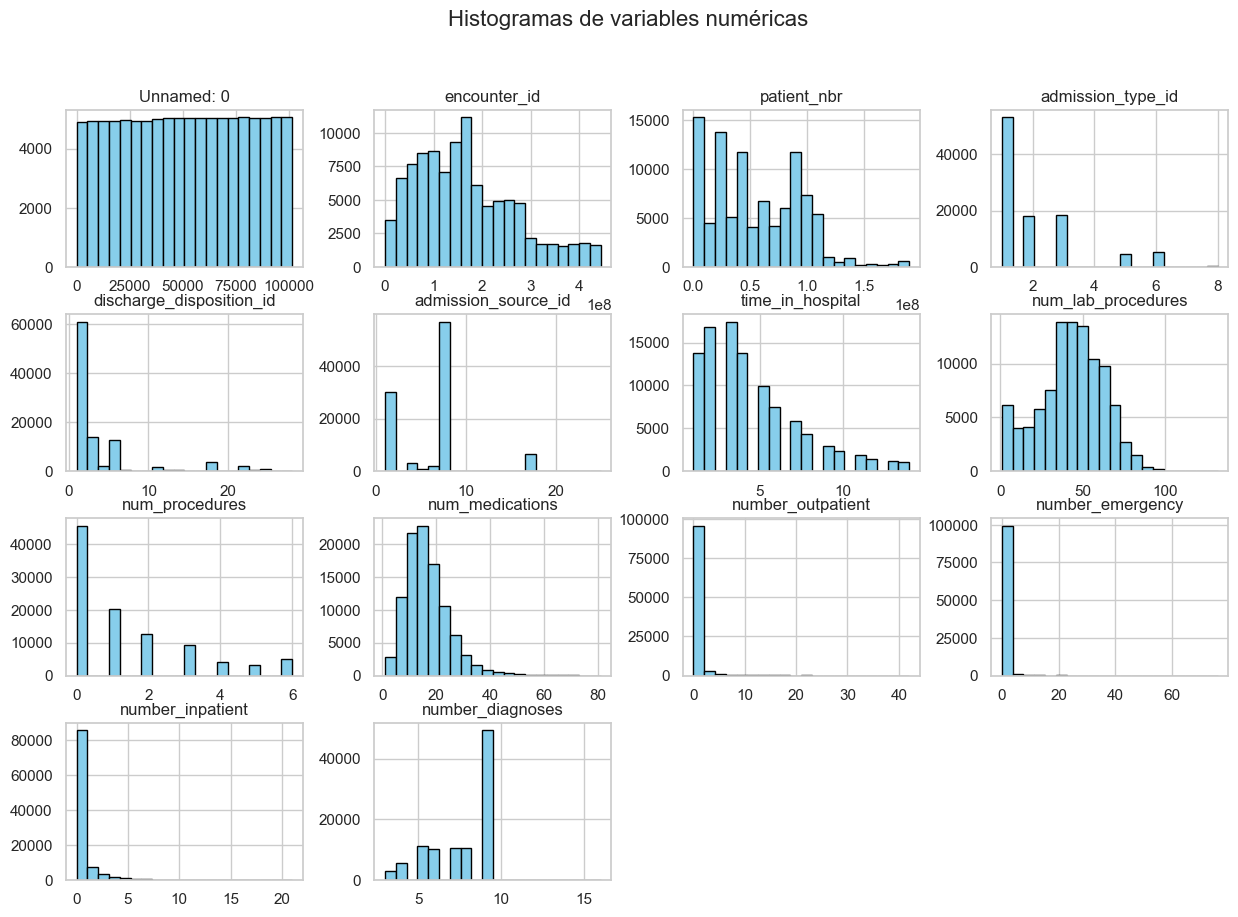

In [13]:
#Distribuciones de las variables
data[numerical_columns].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histogramas de variables numéricas", fontsize=16)
plt.show()

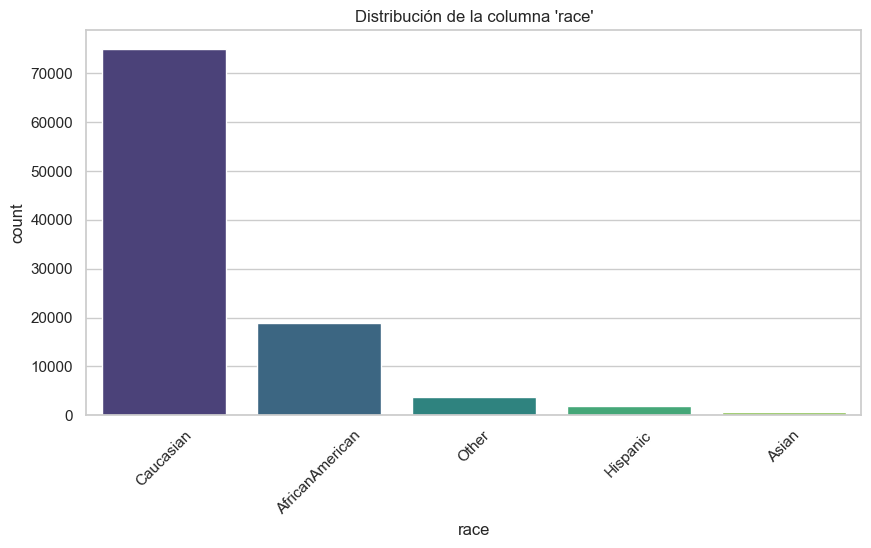

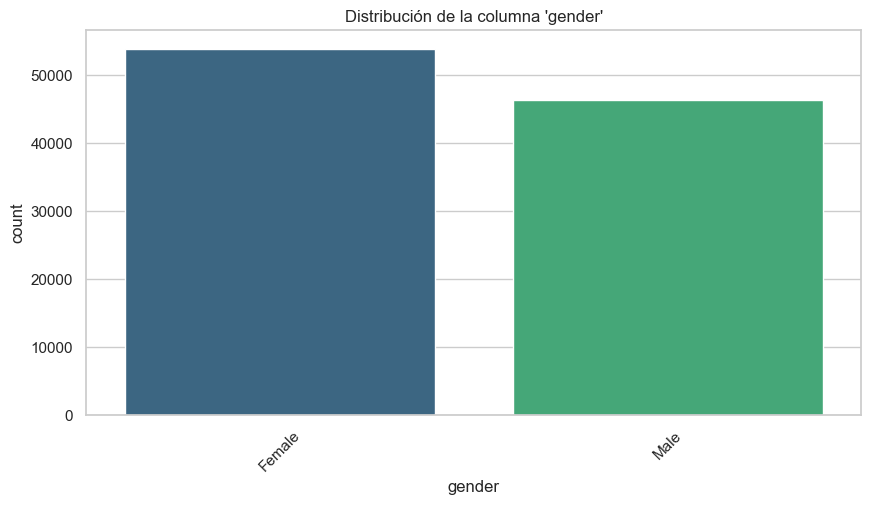

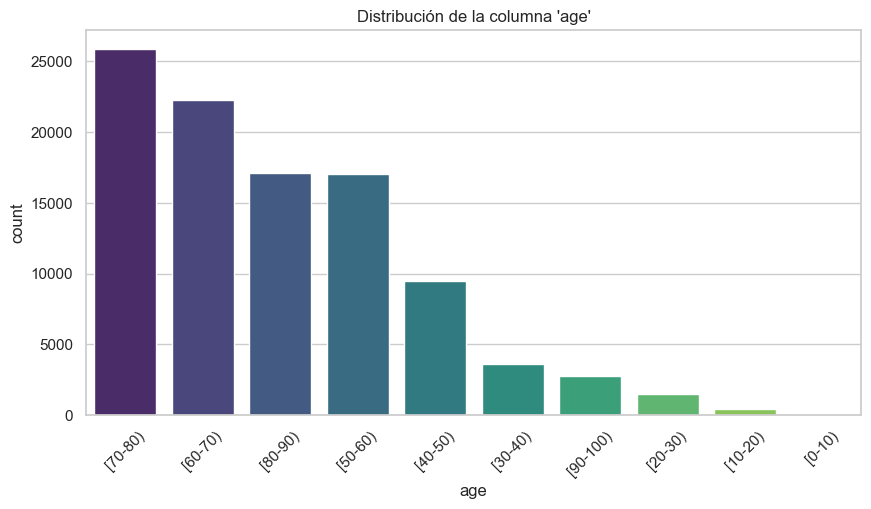

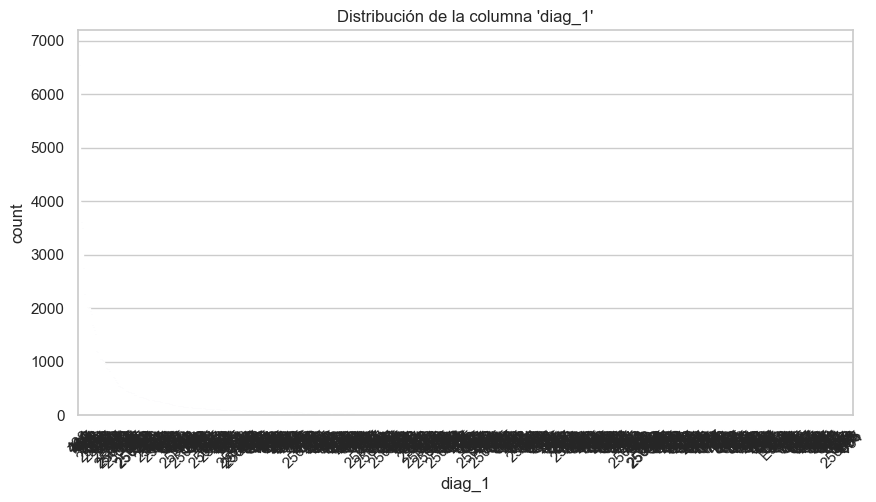

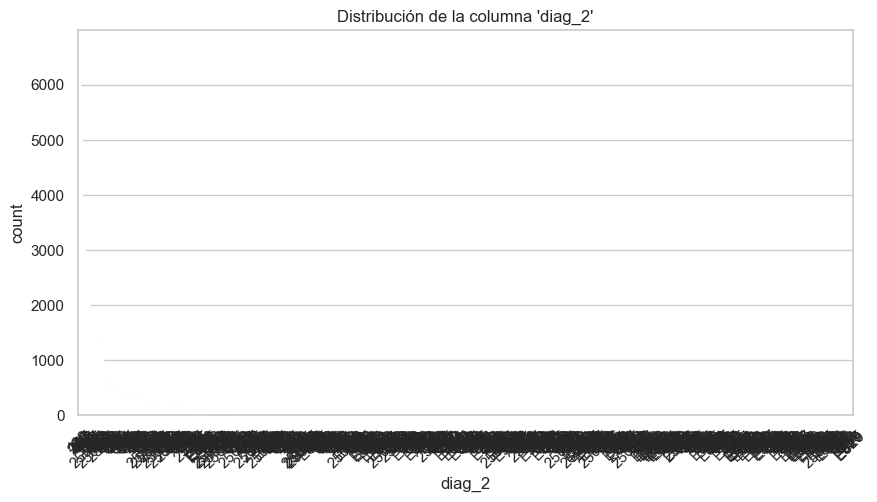

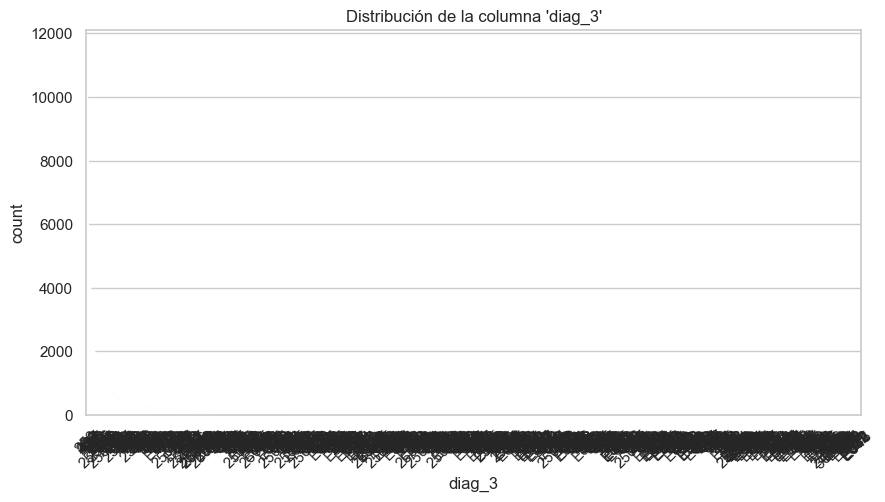

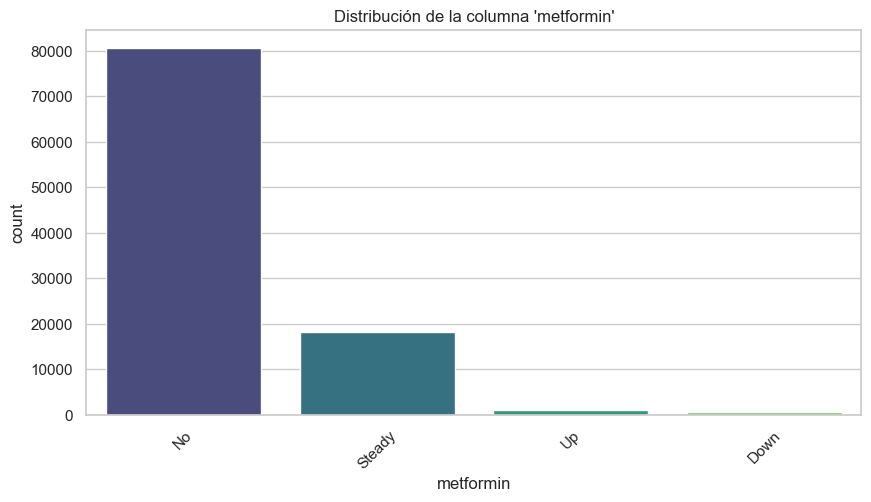

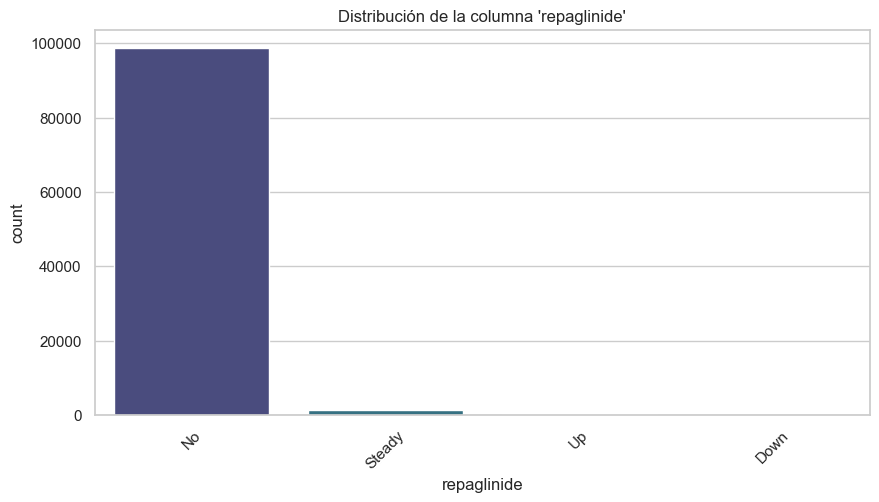

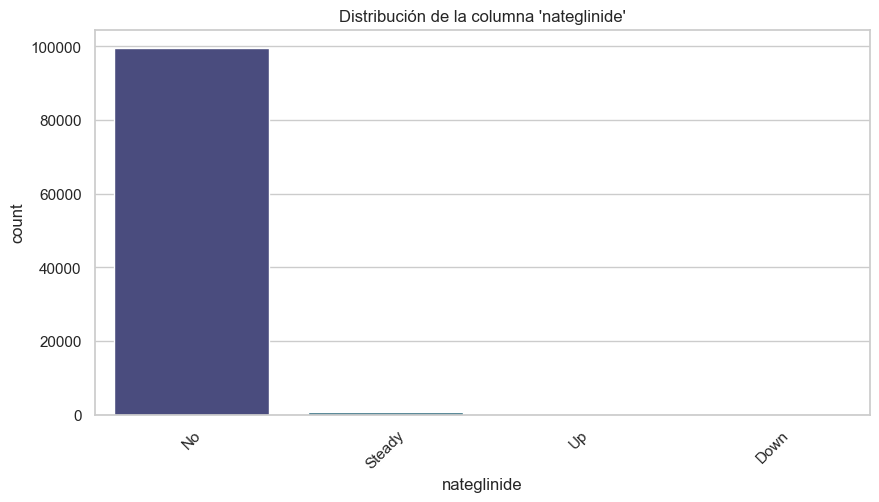

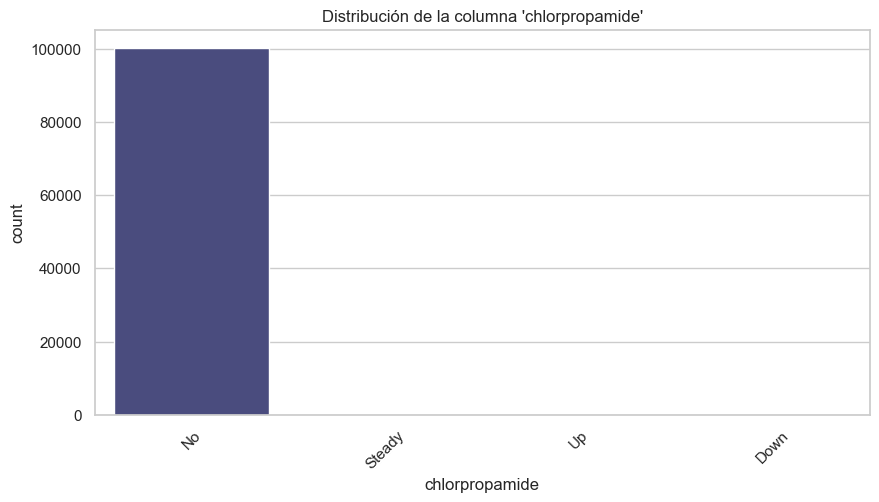

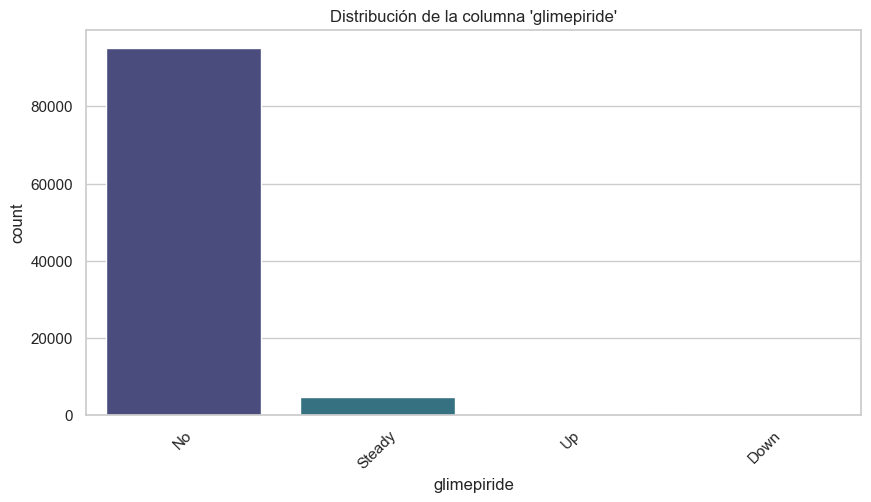

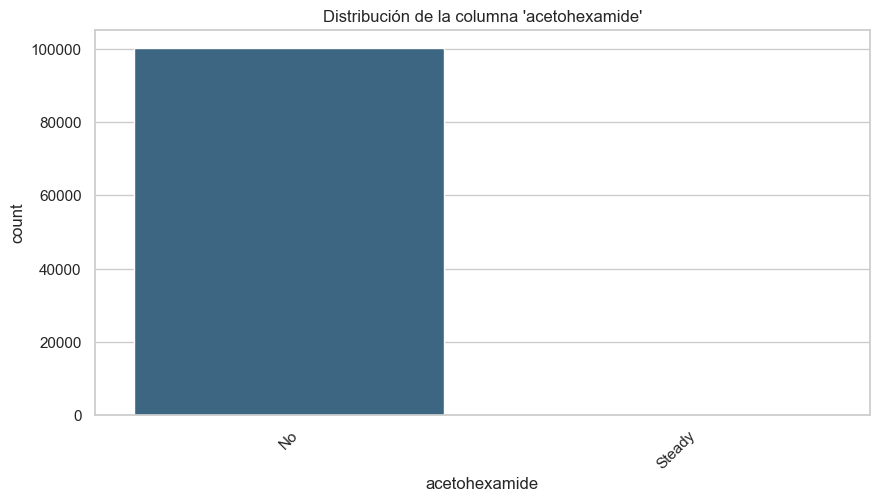

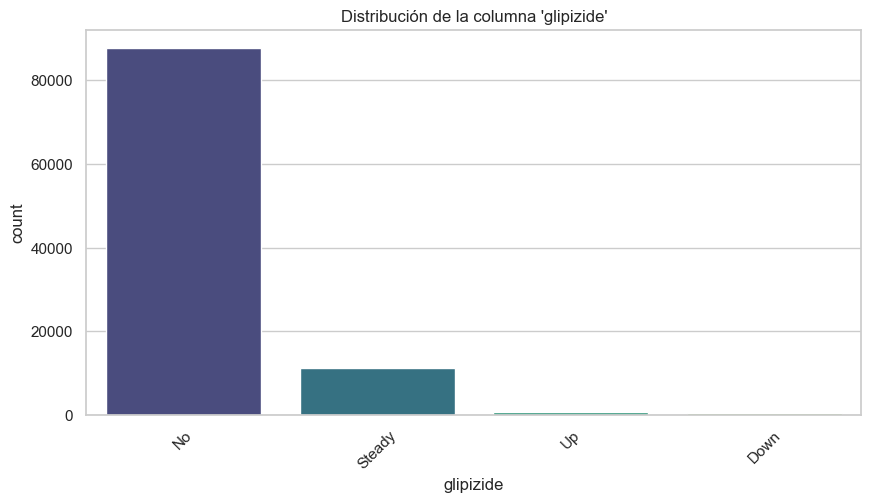

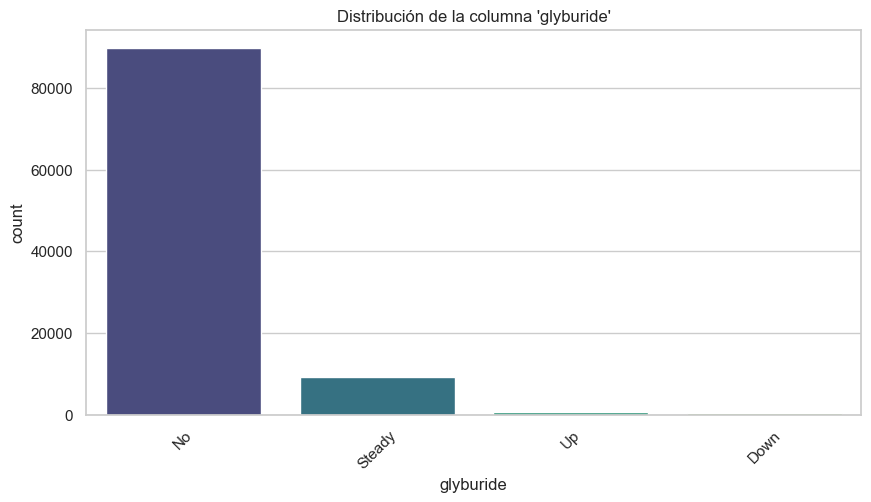

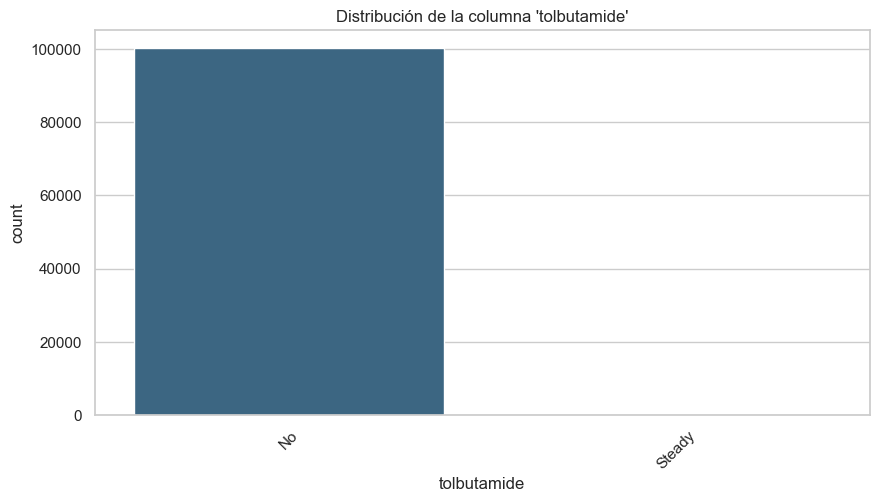

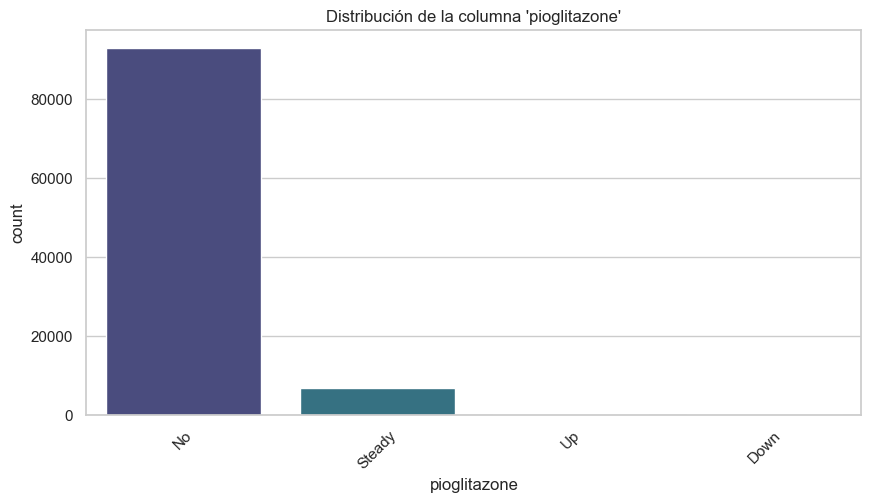

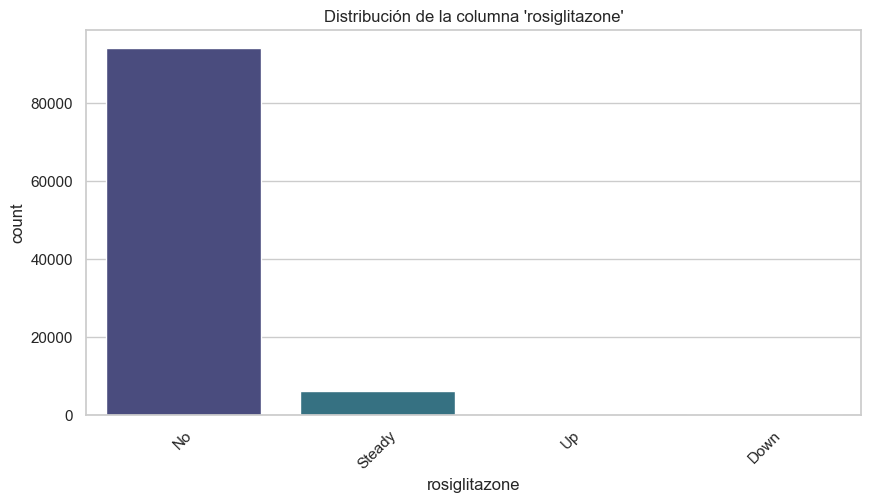

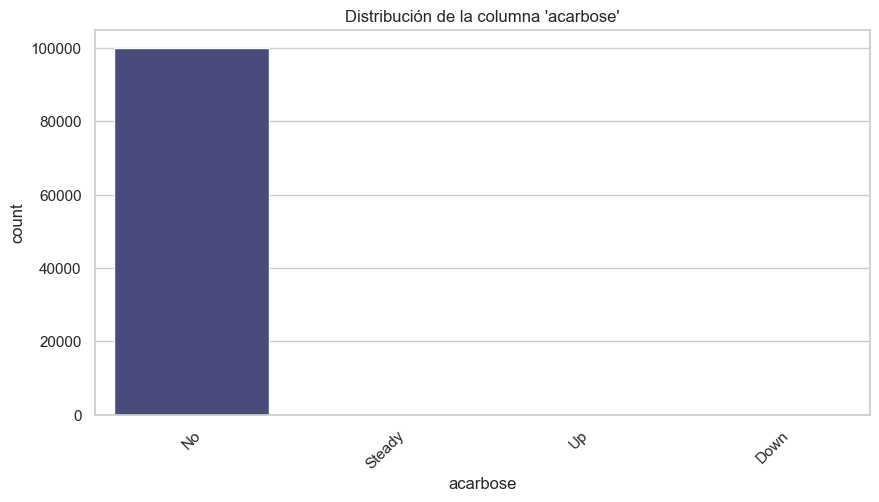

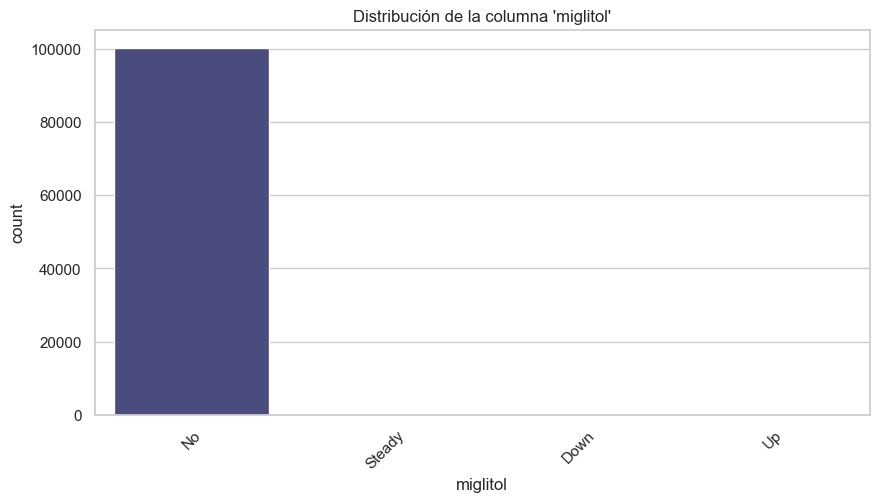

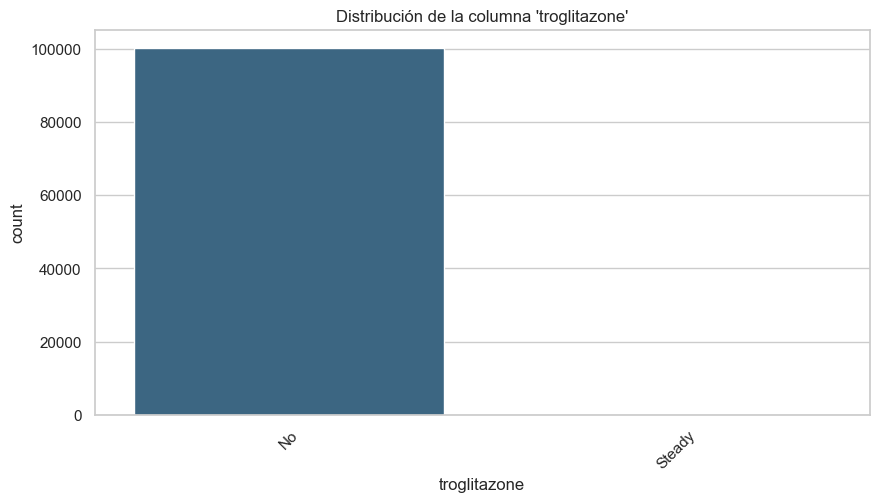

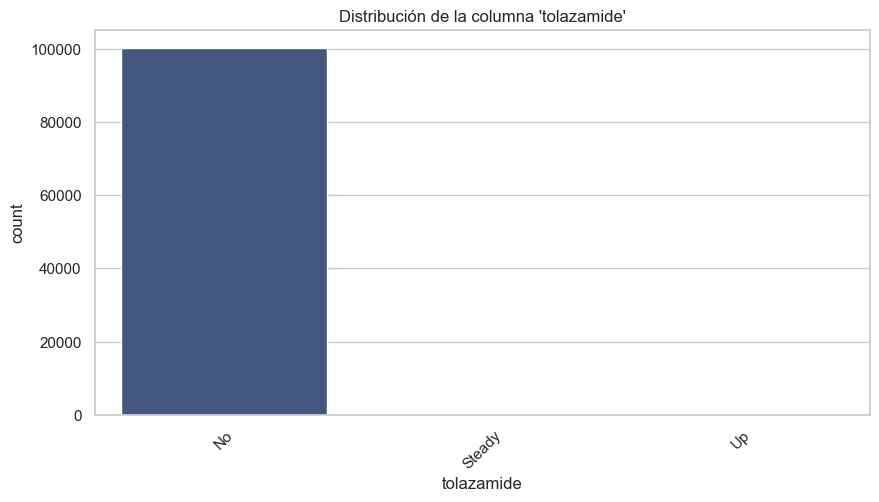

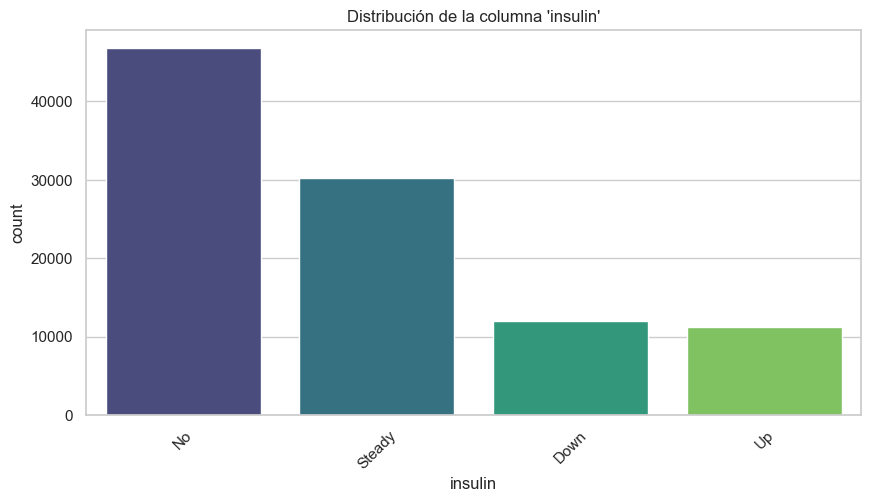

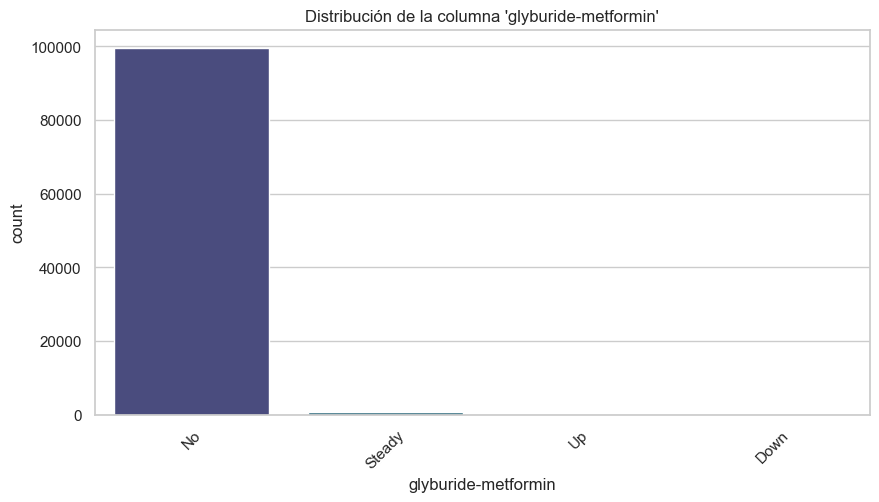

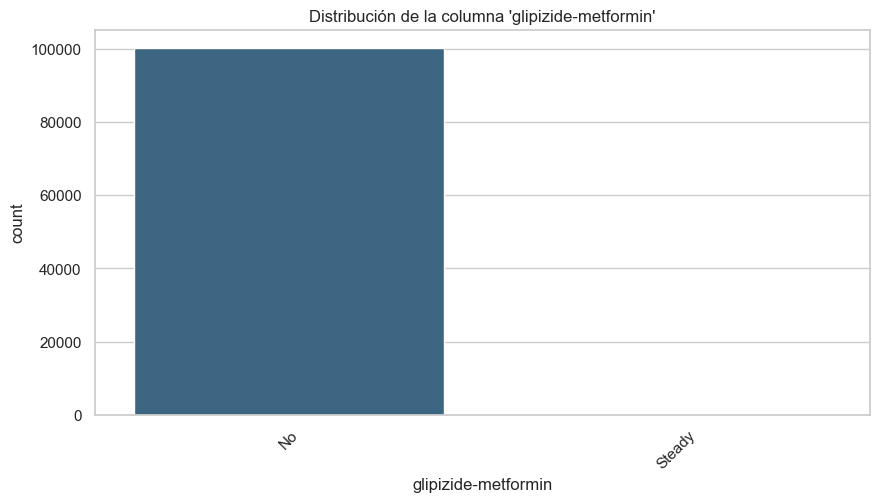

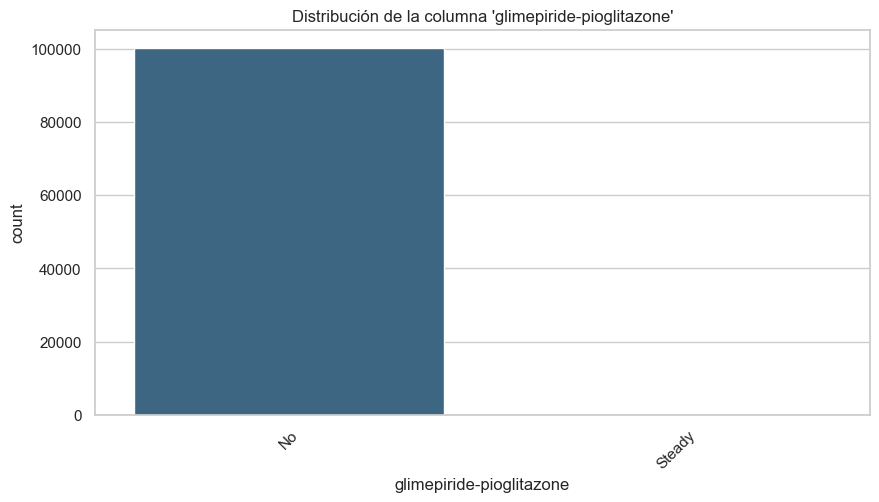

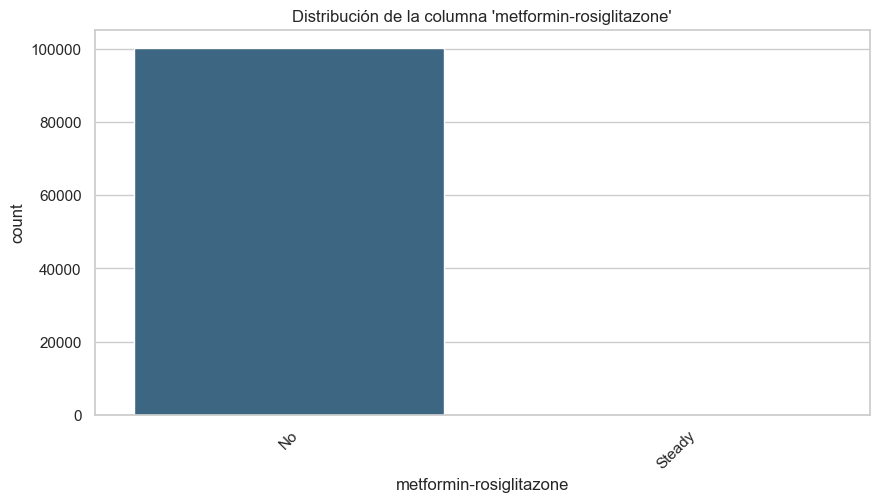

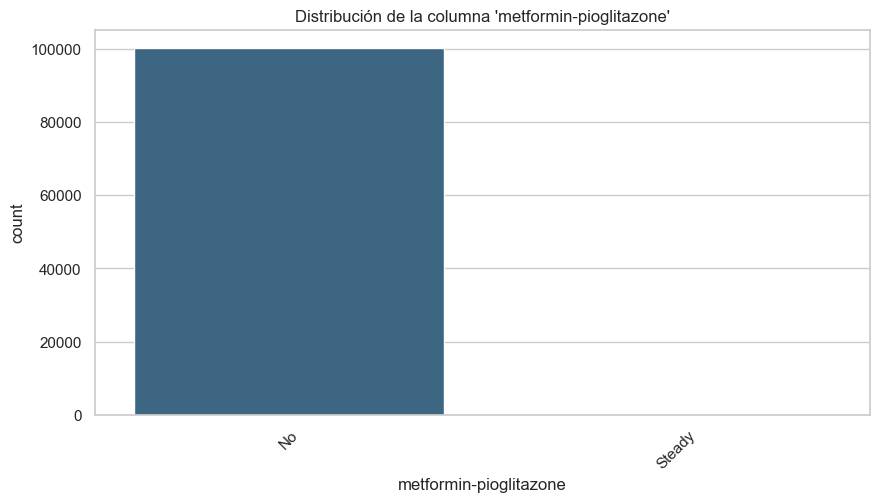

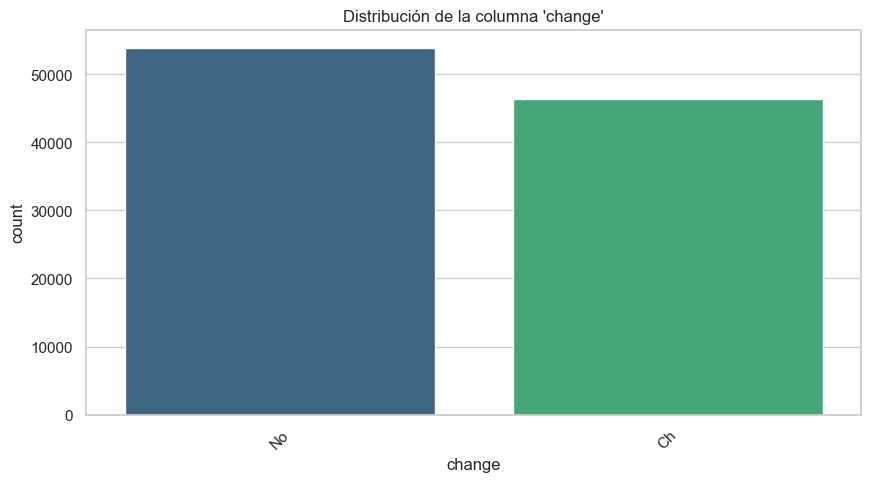

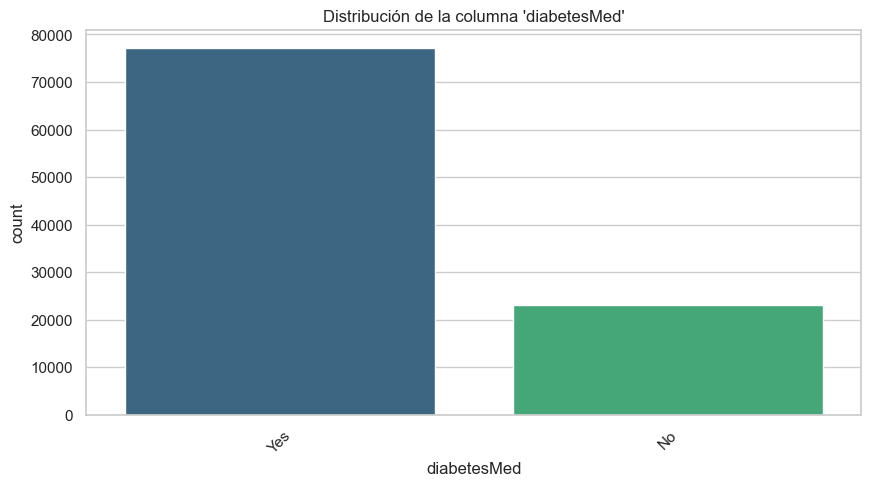

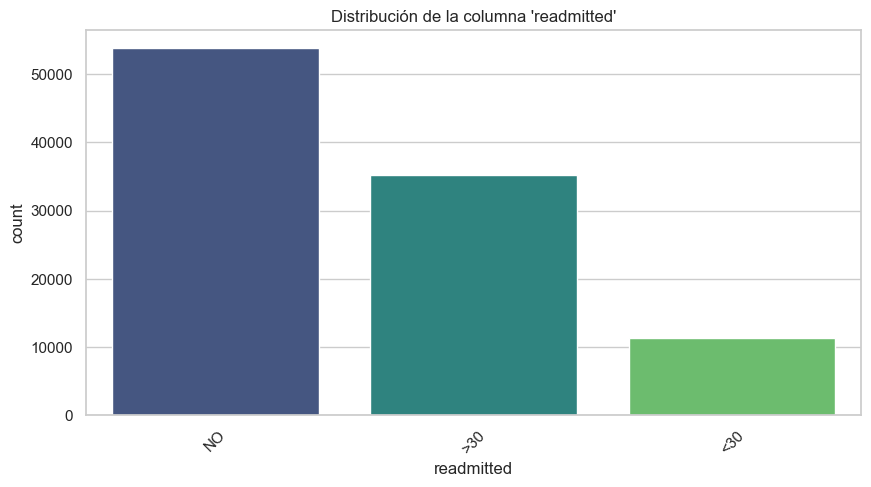

In [14]:
#Distribucion de variables categoricas
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")
    plt.title(f"Distribución de la columna '{col}'")
    plt.xticks(rotation=45)
    plt.show()

In [15]:
#Ajustar la variable objetivo
data['readmitted_numeric'] = data['readmitted'].apply(lambda x: 1 if x in ['<30', '>30'] else 0)
numerical_columns = numerical_columns.append(pd.Index(['readmitted_numeric']))

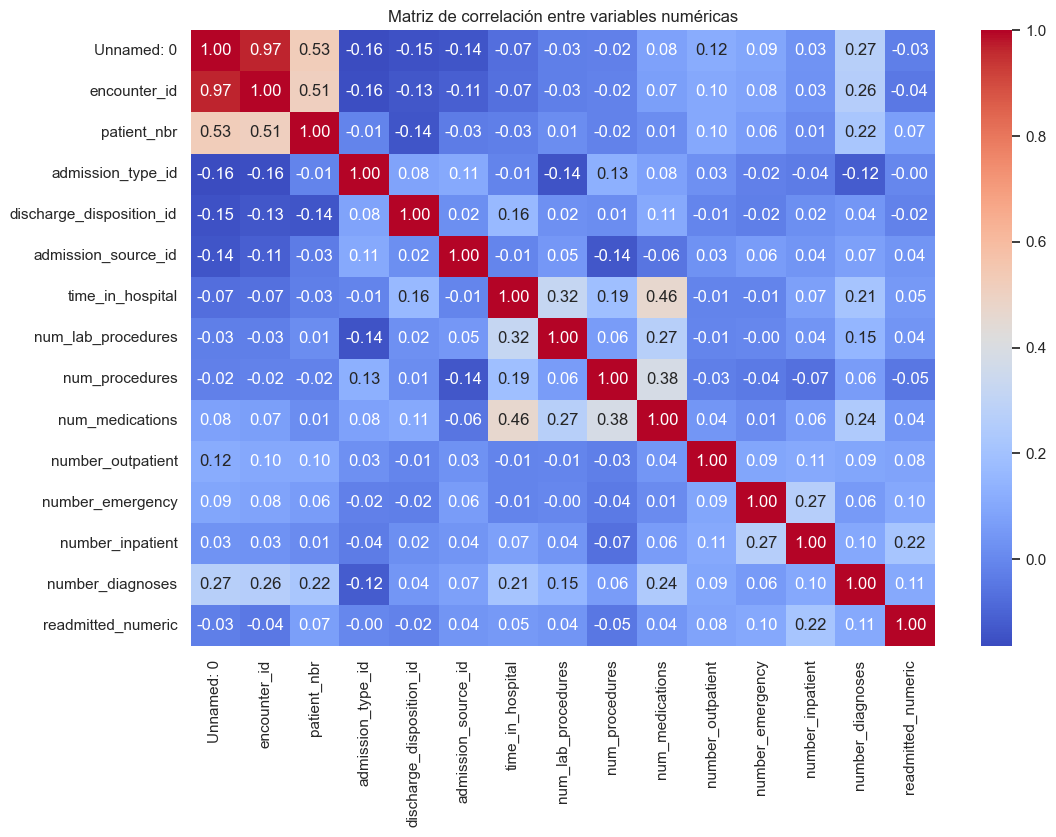

In [16]:
# Calcular matriz de correlación
correlation_matrix = data[numerical_columns].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

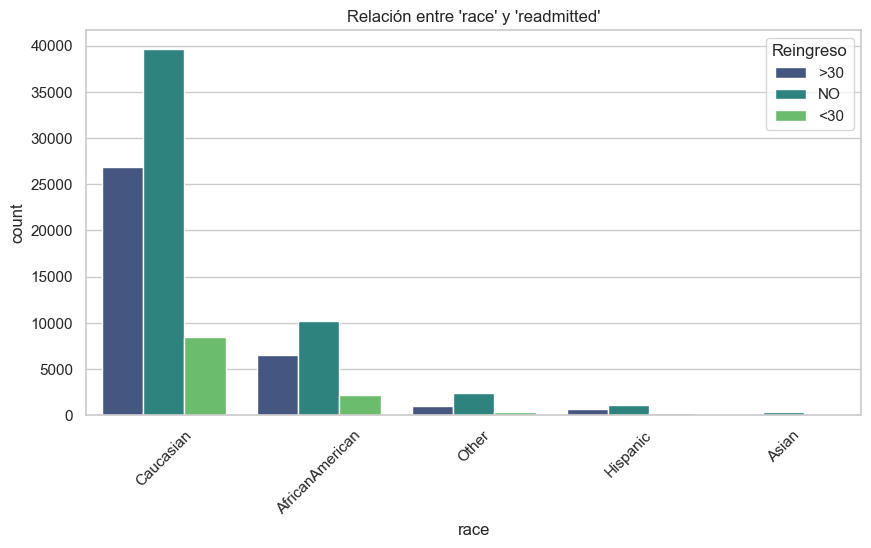

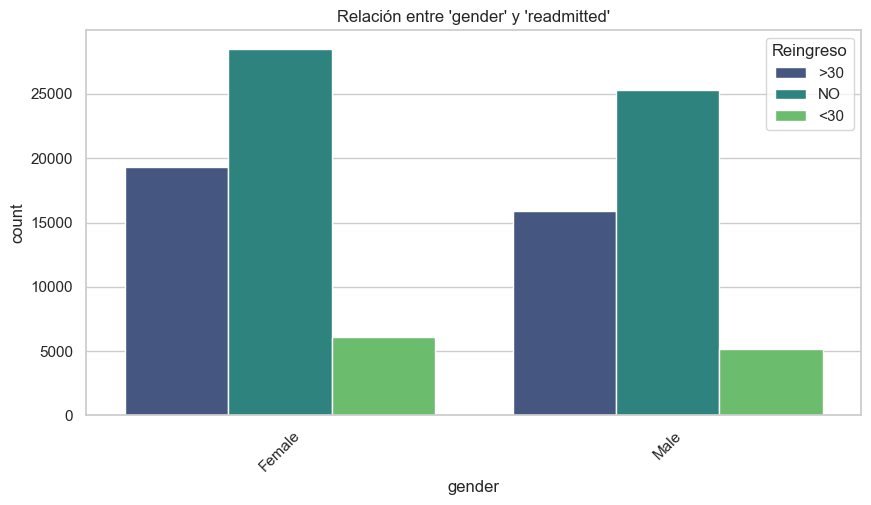

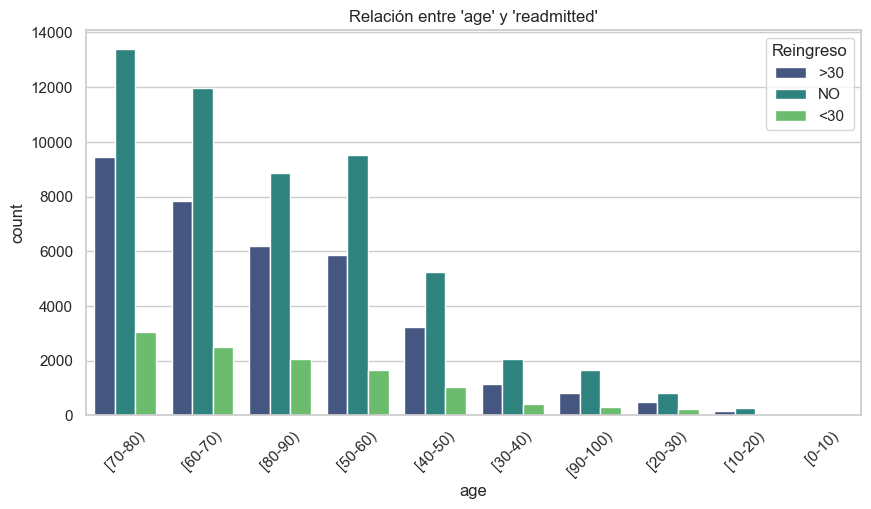

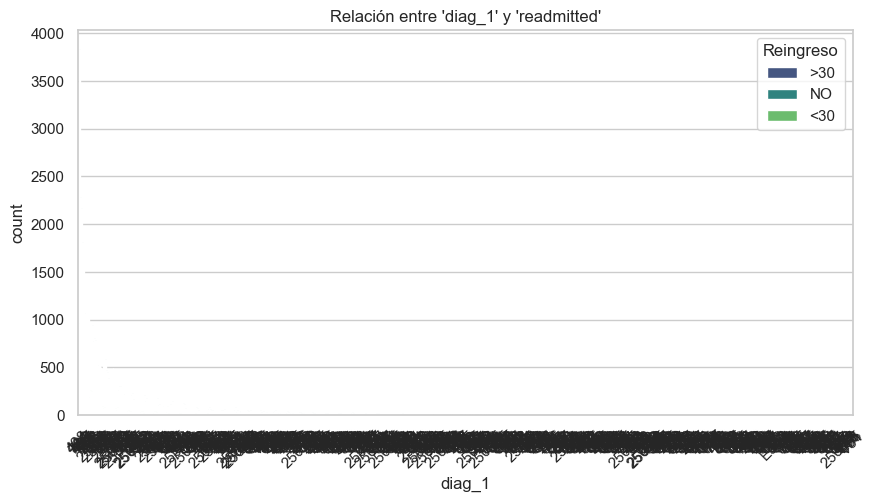

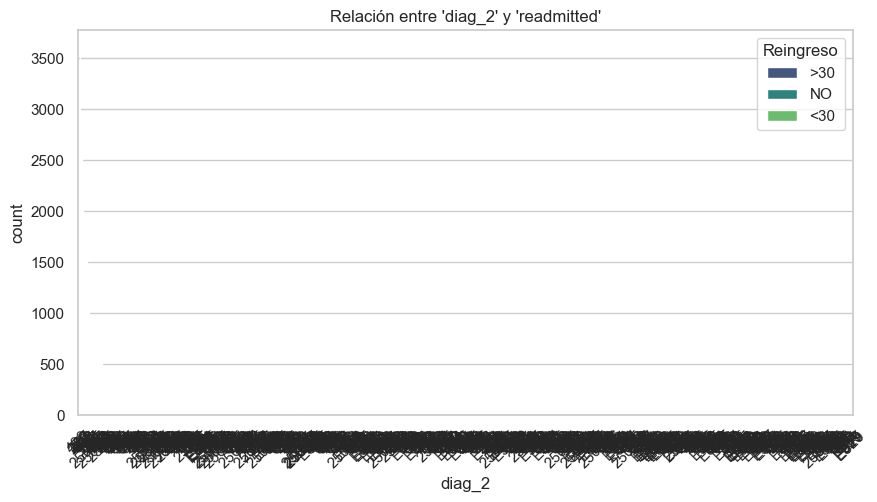

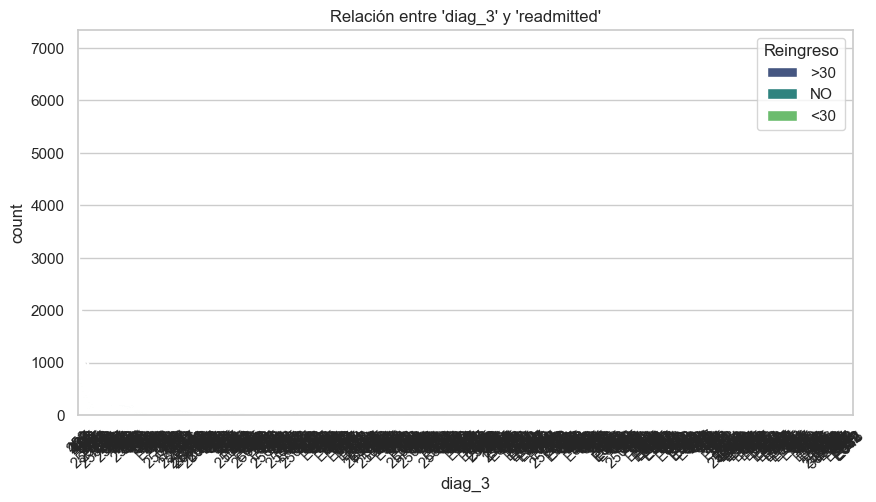

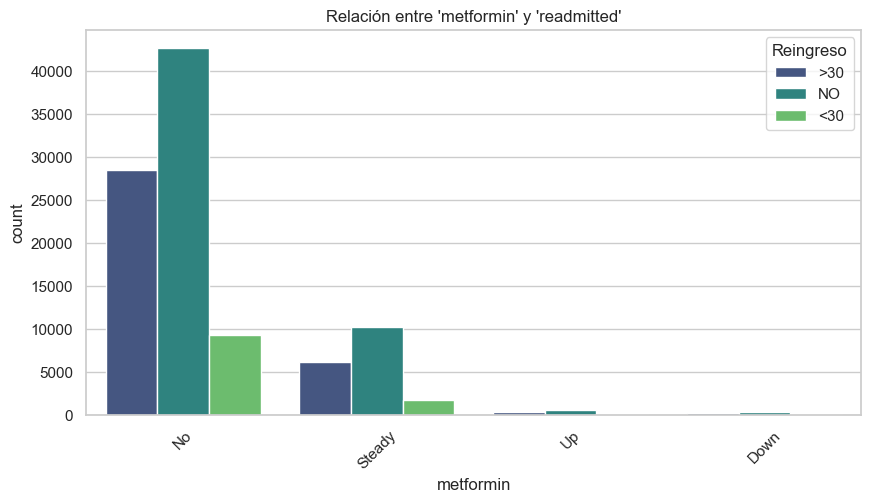

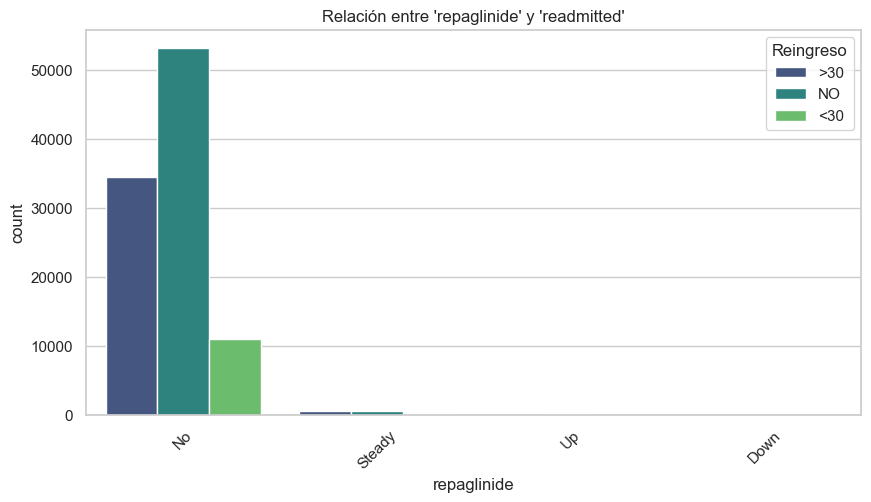

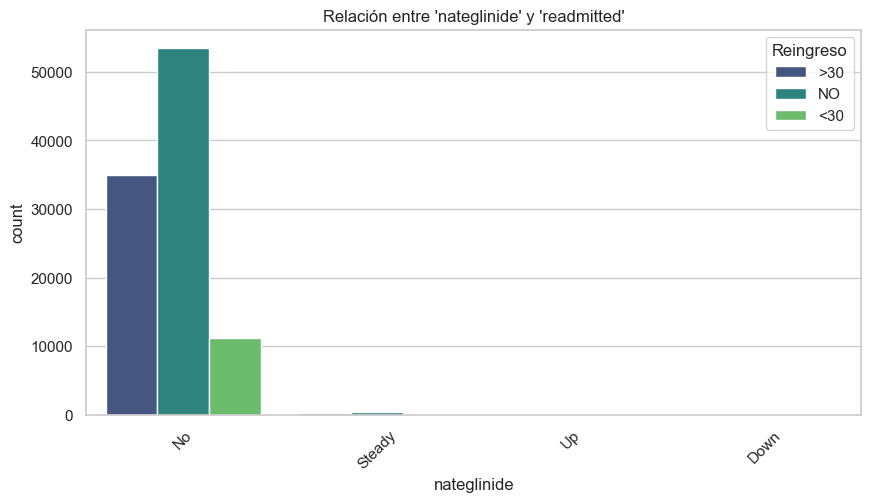

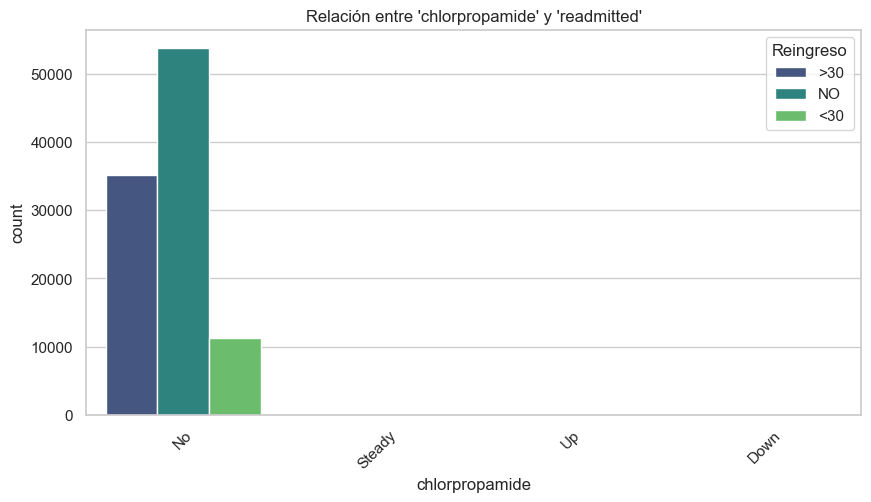

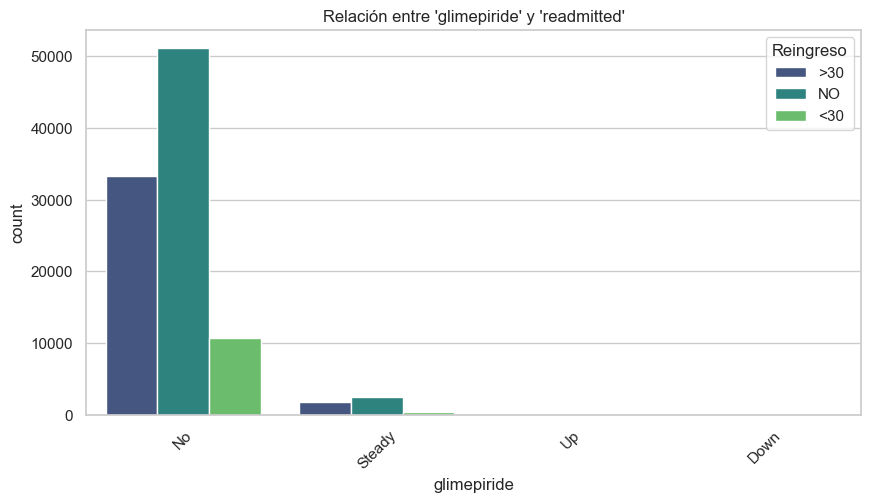

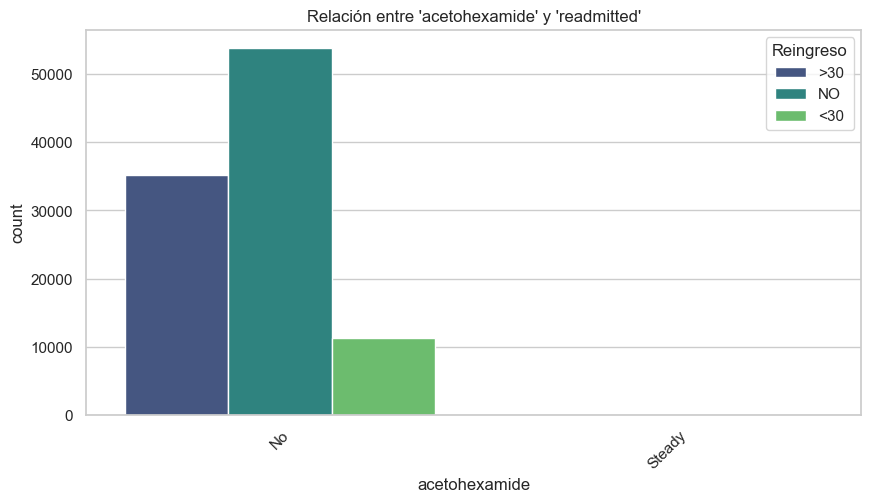

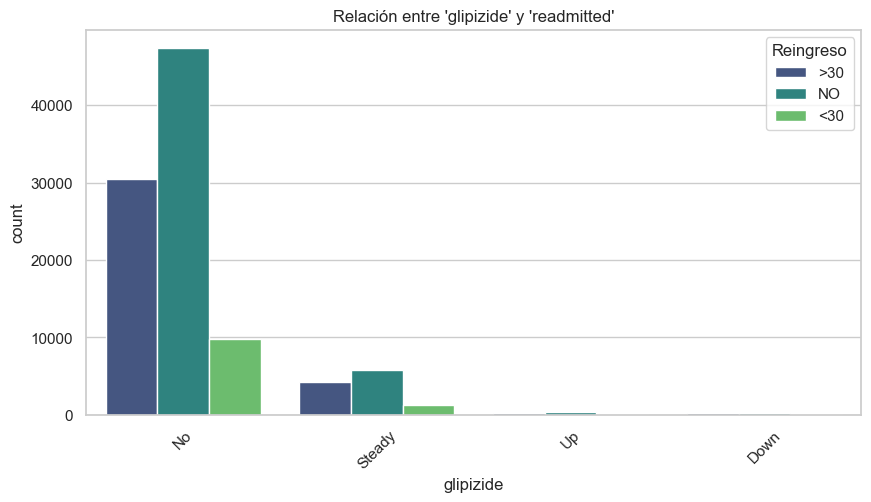

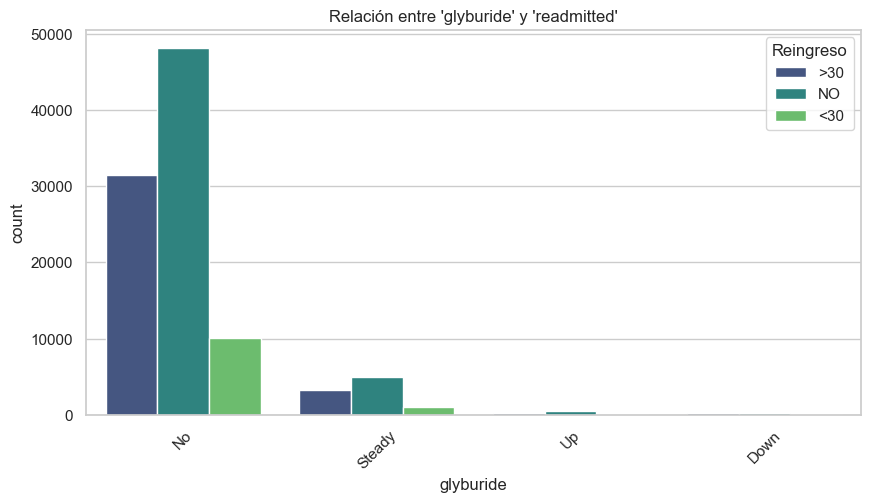

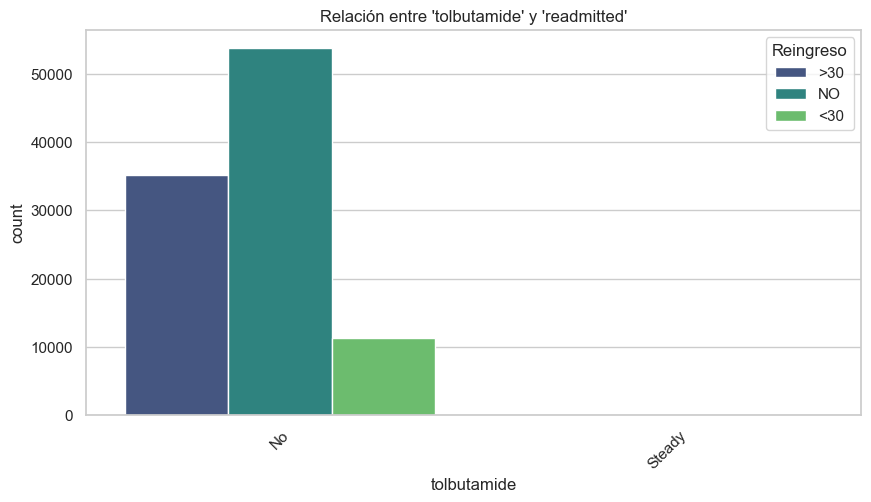

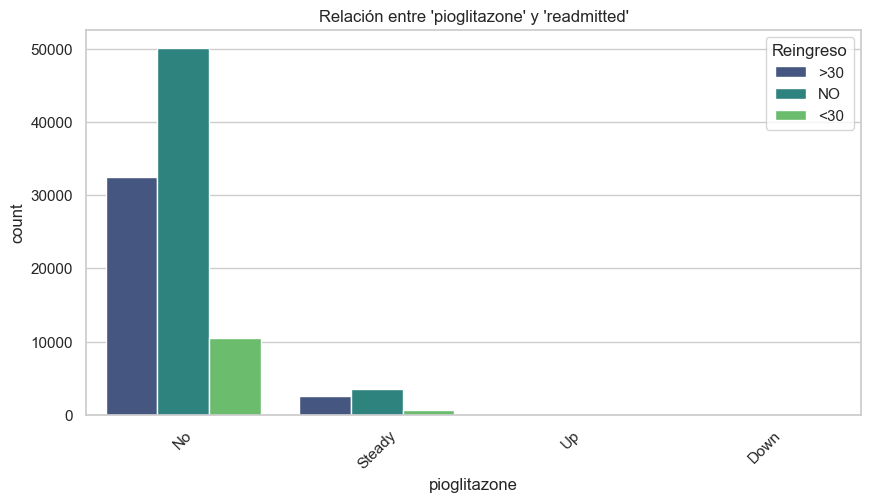

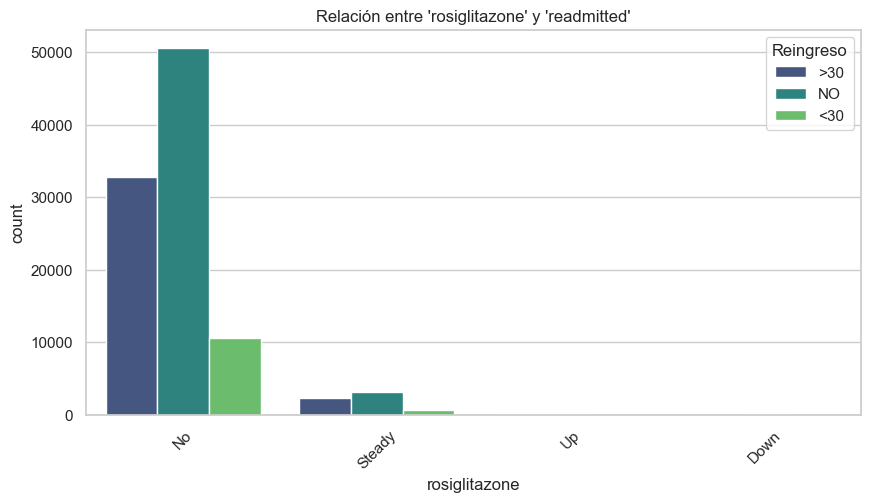

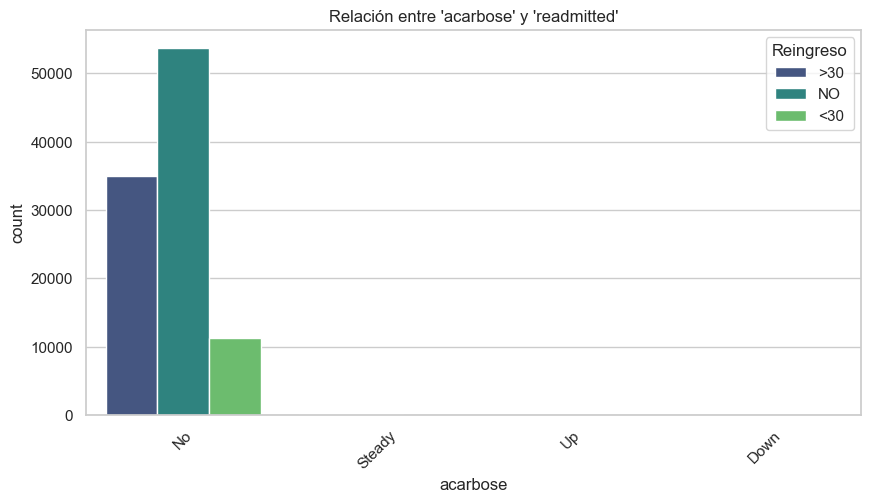

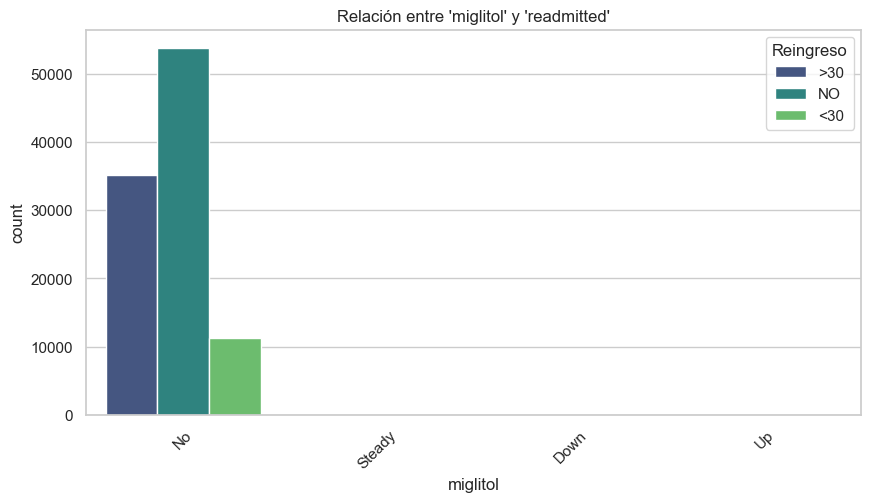

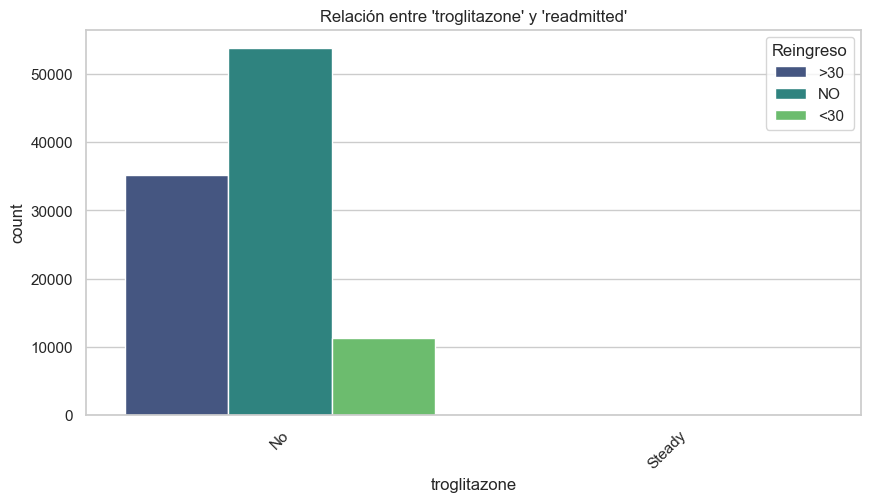

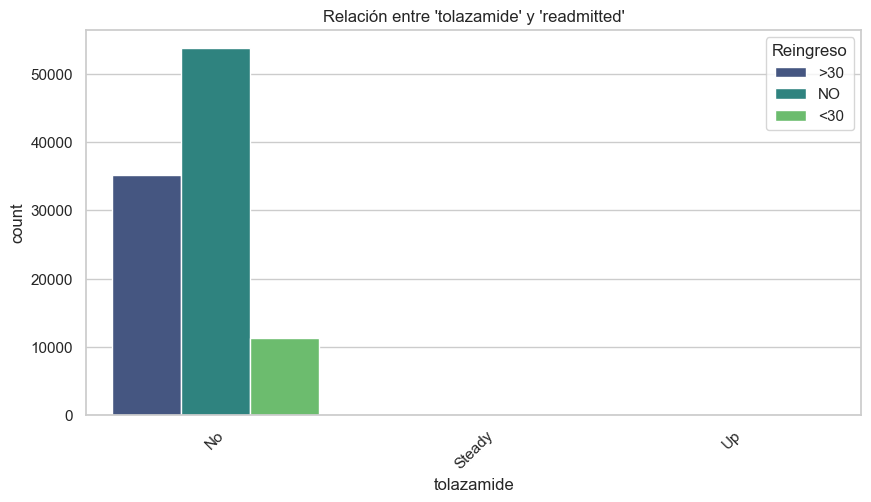

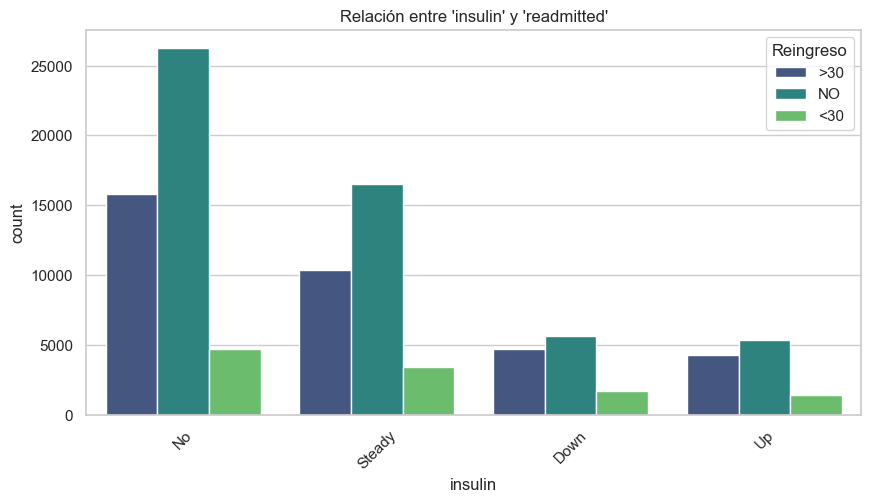

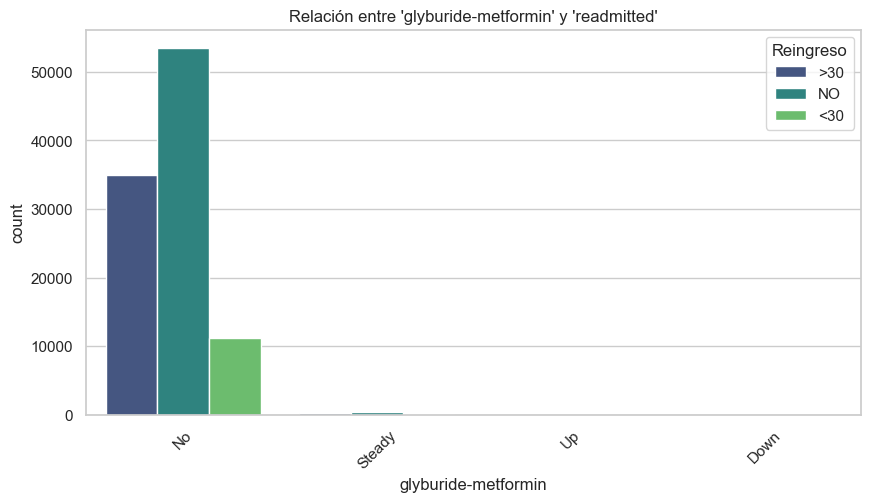

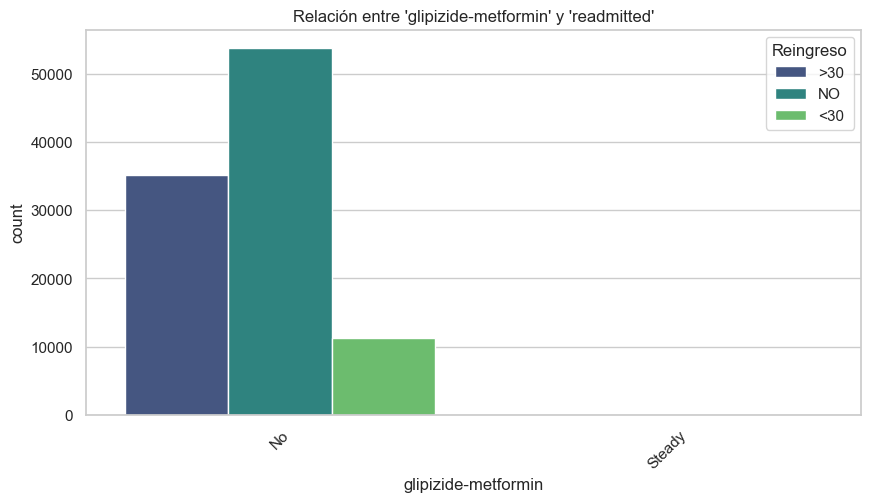

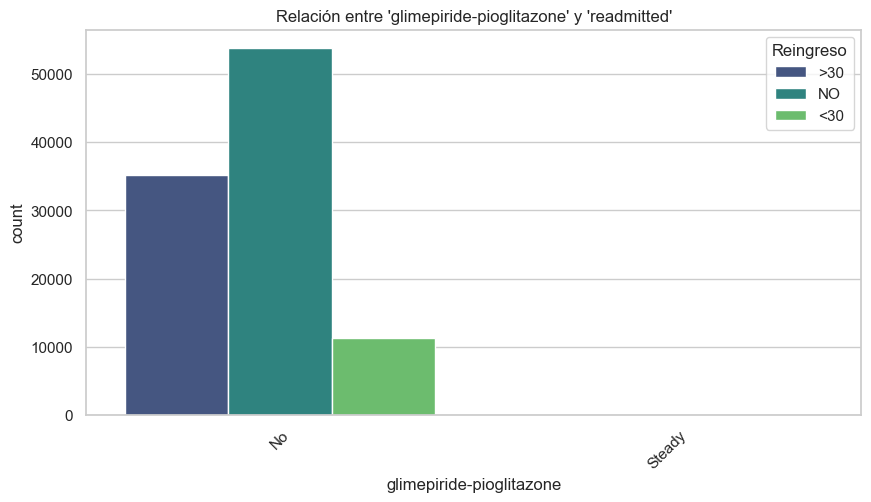

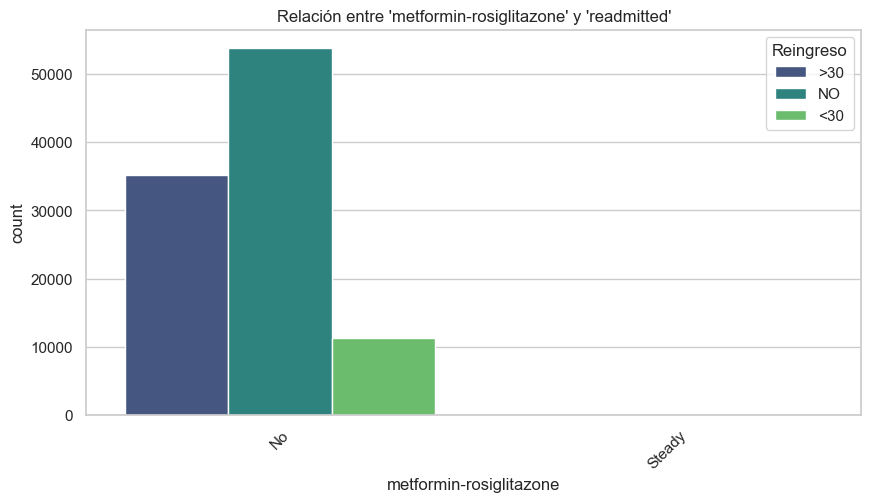

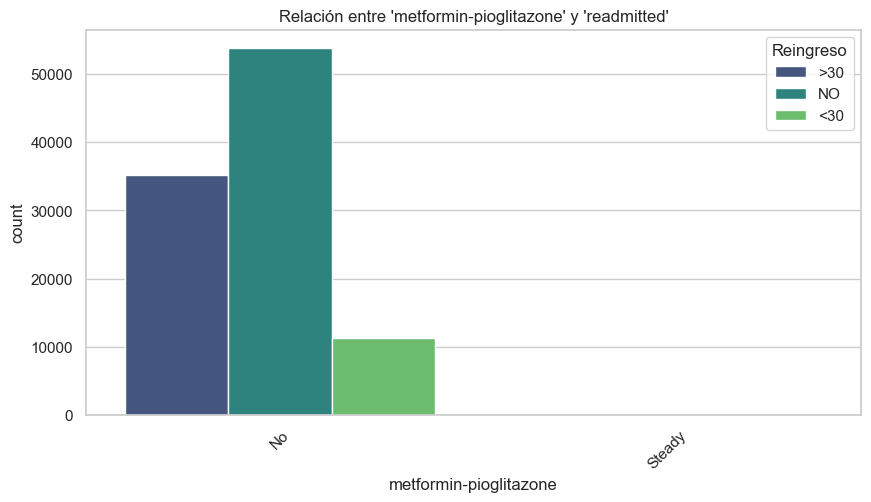

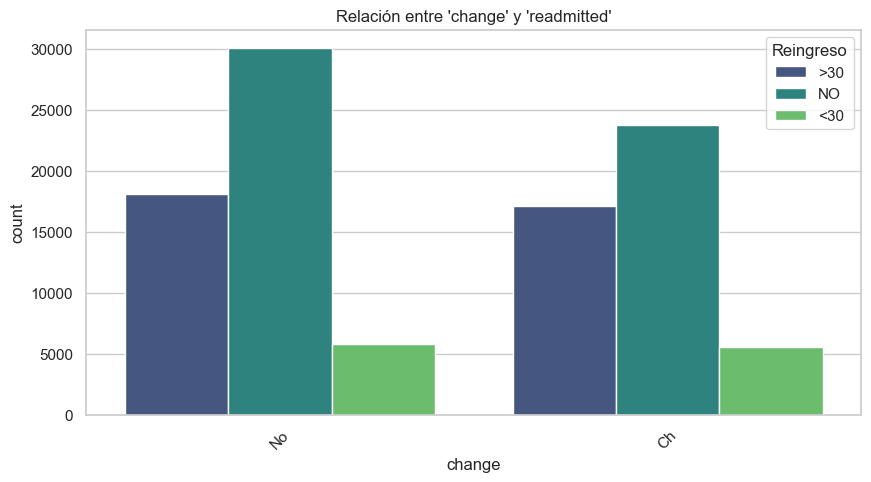

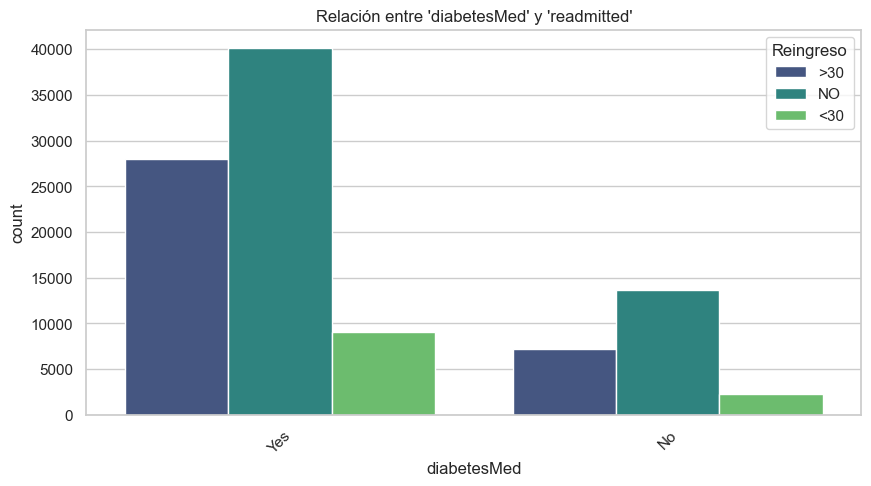

In [17]:
# Relación entre 'readmitted' y otras variables categóricas
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    if col != 'readmitted':  # Omitir la variable objetivo
        plt.figure(figsize=(10, 5))
        sns.countplot(data=data, x=col, hue='readmitted', order=data[col].value_counts().index, palette="viridis")
        plt.title(f"Relación entre '{col}' y 'readmitted'")
        plt.xticks(rotation=45)
        plt.legend(title='Reingreso')
        plt.show()

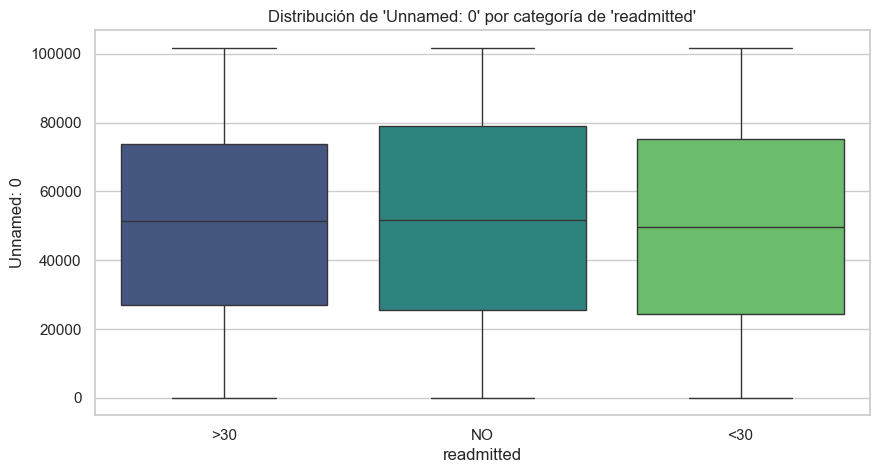

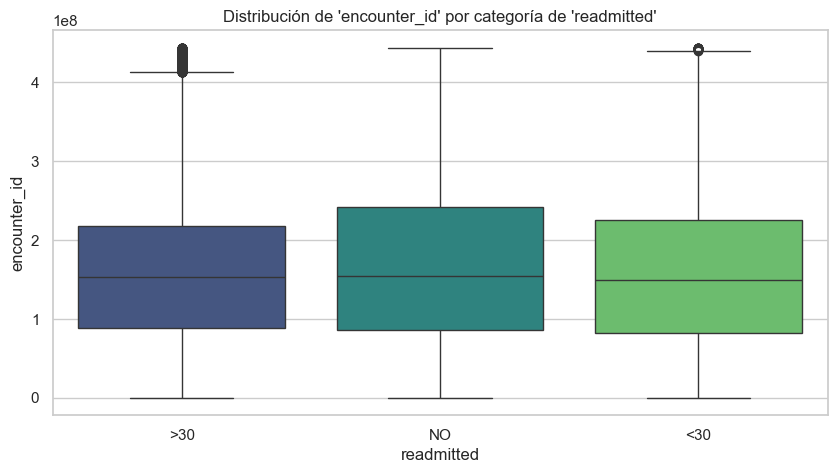

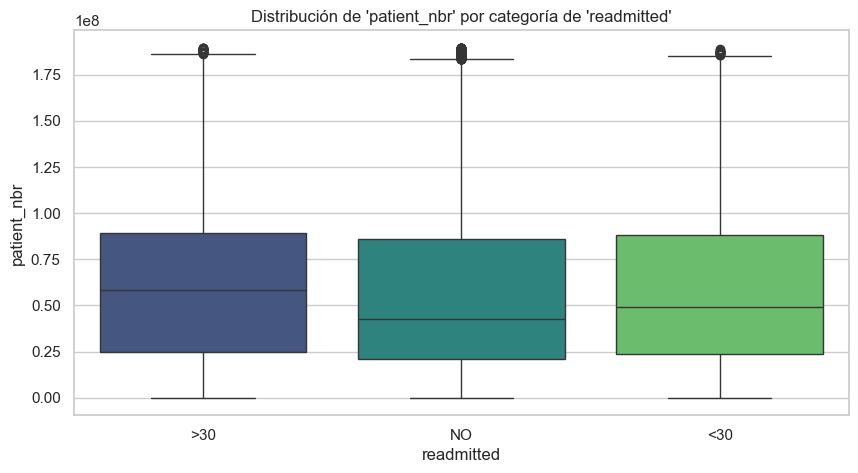

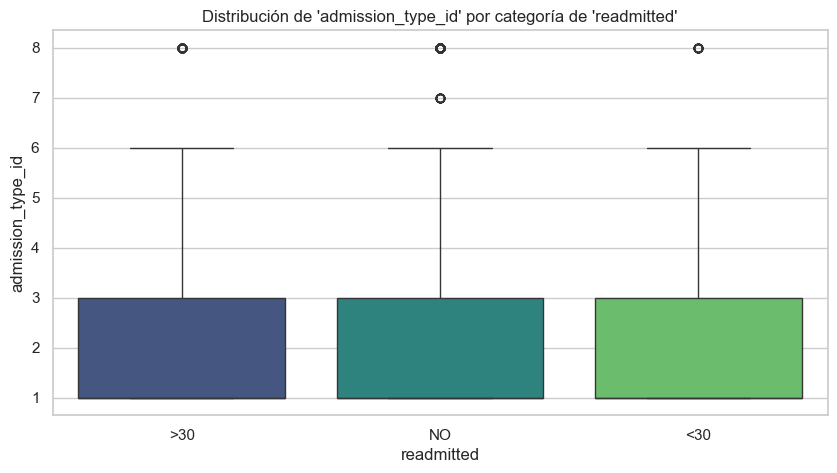

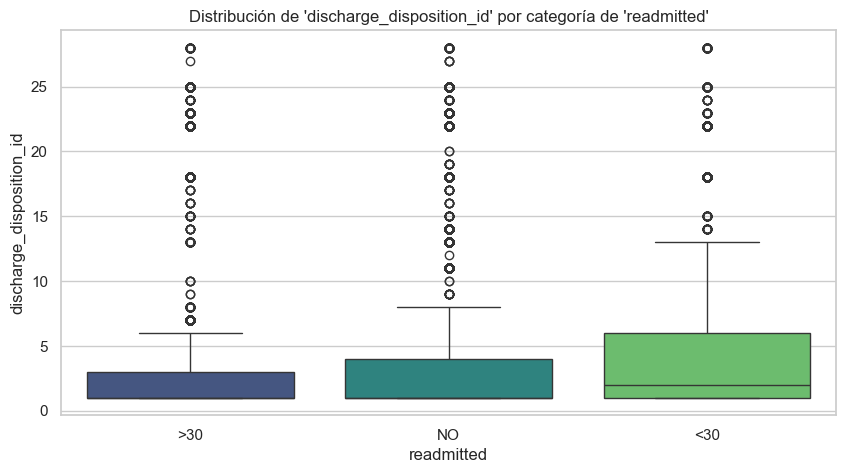

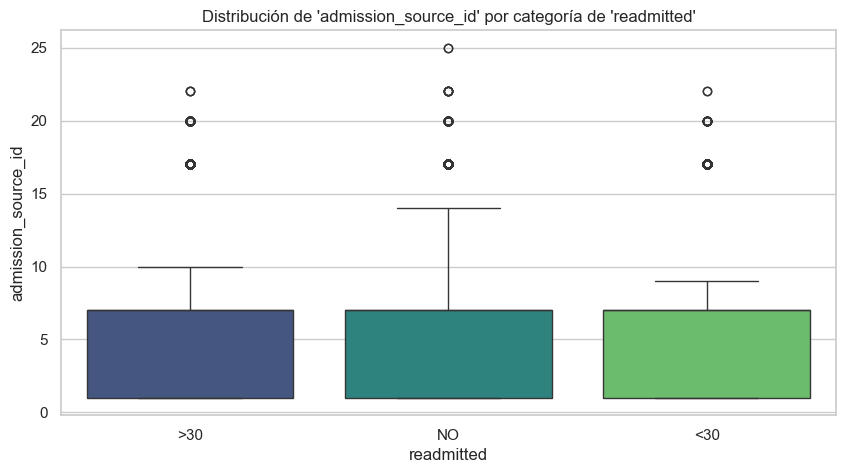

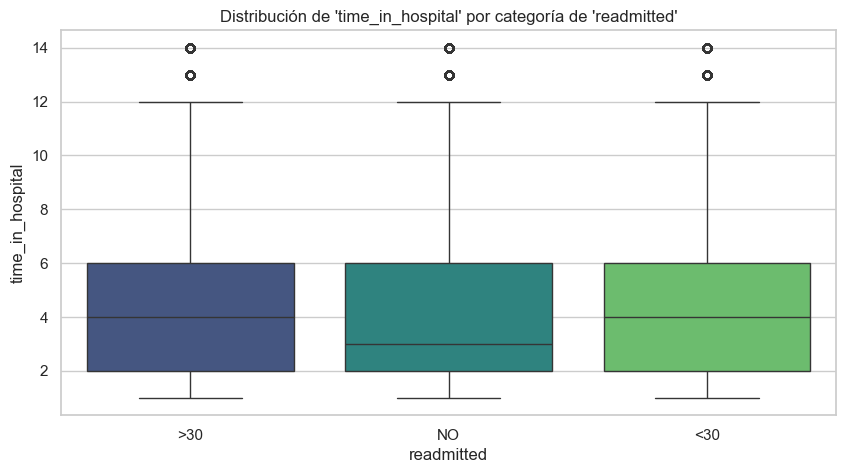

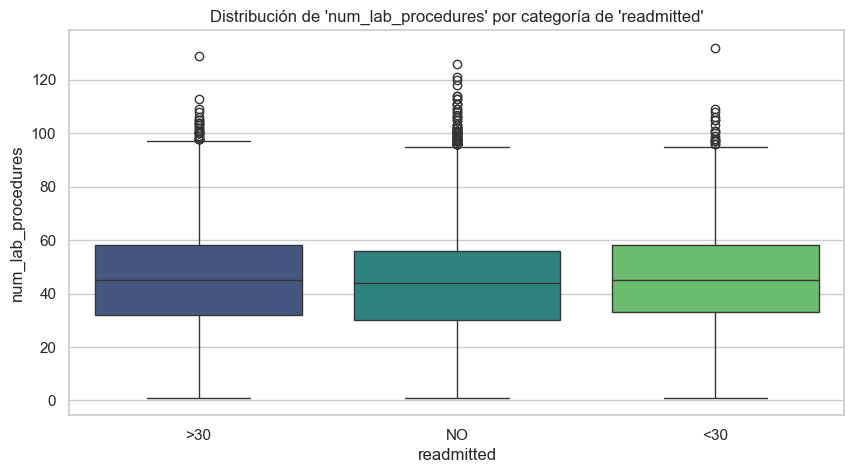

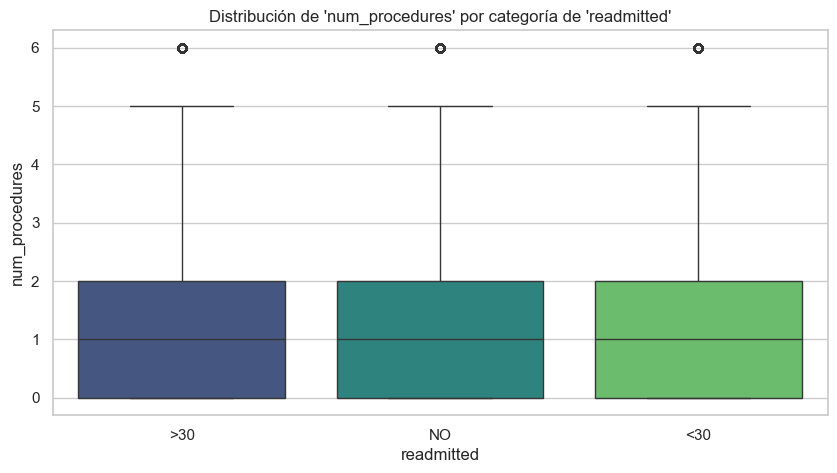

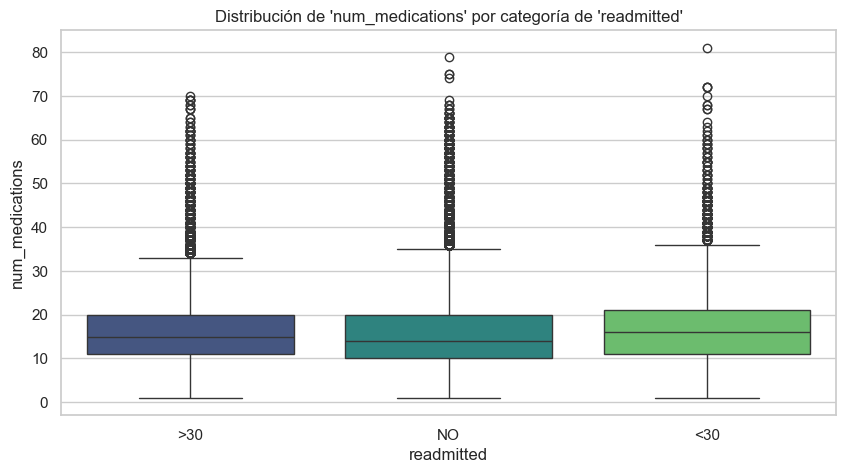

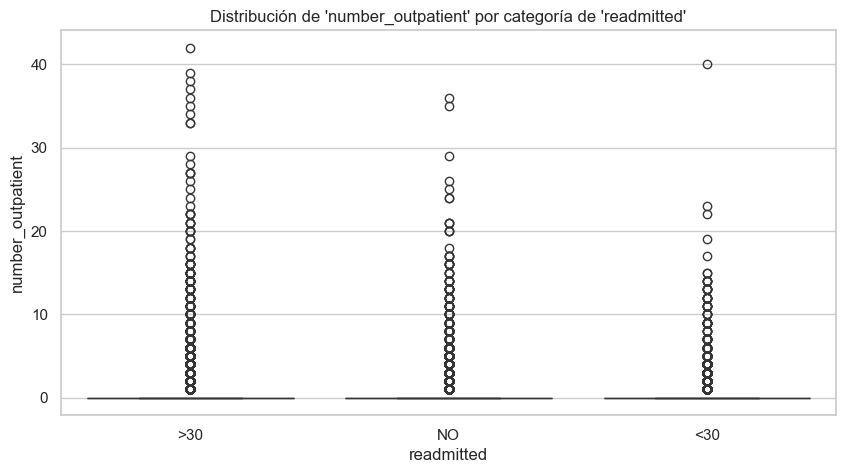

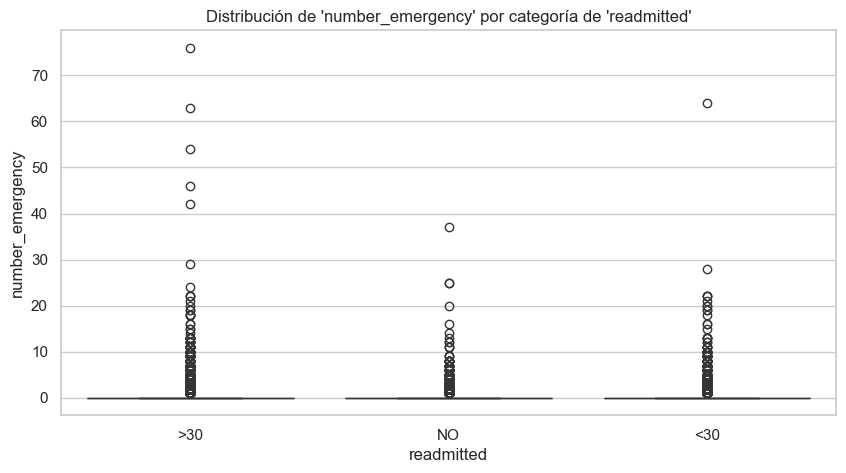

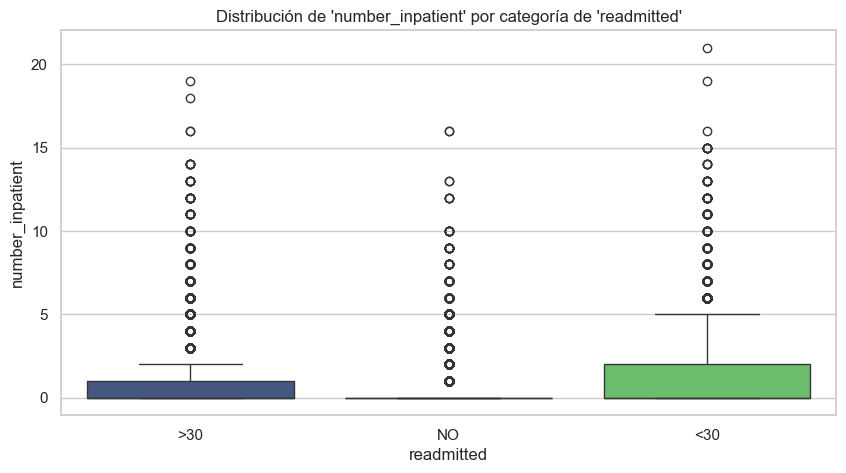

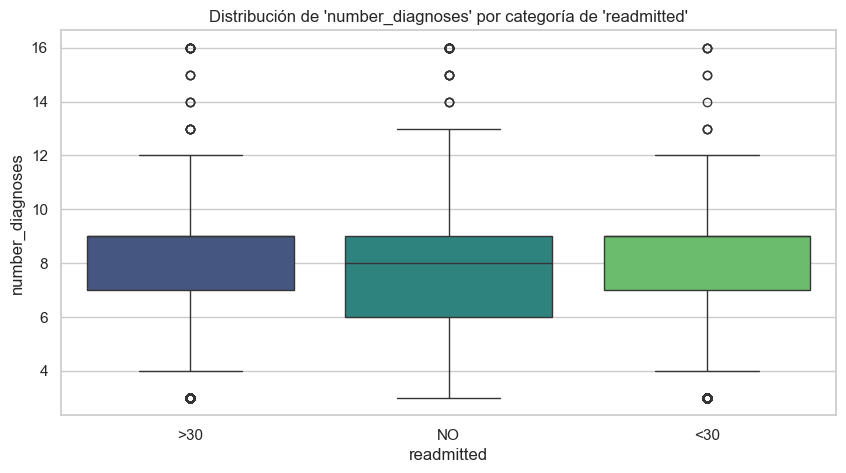

In [18]:
# Boxplots para visualizar la relación entre variables numéricas y 'readmitted'
for col in numerical_columns:
    if col != 'readmitted_numeric':  # Evitar duplicados si se agregó
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=data, x='readmitted', y=col, palette="viridis")
        plt.title(f"Distribución de '{col}' por categoría de 'readmitted'")
        plt.show()


## 5. Construcción del modelo

In [19]:
# Selección de variables: eliminamos las columnas irrelevantes
X = data.drop(['encounter_id', 'patient_nbr', 'Unnamed: 0', 'readmitted'], axis=1, errors='ignore')
y = data['readmitted']  # Variable objetivo

# Verificar las dimensiones después de la selección
print(f"Dimensiones de las variables predictoras: {X.shape}")
print(f"Dimensiones de la variable objetivo: {y.shape}")

Dimensiones de las variables predictoras: (100241, 41)
Dimensiones de la variable objetivo: (100241,)


In [22]:
# Transformar la variable objetivo a 0 y 1
y = data['readmitted'].apply(lambda x: 1 if x in ['<30', '>30'] else 0)

# Verificar la distribución después de la conversión
print(y.value_counts(normalize=True))

readmitted
0    0.536886
1    0.463114
Name: proportion, dtype: float64


In [33]:
# Identificar las columnas categóricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Aplicar One-Hot Encoding a las columnas categóricas
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')  # Cambiar 'sparse' a 'sparse_output'
X_encoded = encoder.fit_transform(X[categorical_cols])

# Crear un DataFrame con las columnas codificadas
encoded_cols = encoder.get_feature_names_out(categorical_cols)

# Ajustar el número de columnas al número de datos codificados
if X_encoded.shape[1] != len(encoded_cols):
    print(f"Advertencia: Las dimensiones no coinciden. Ajustando columnas...")
encoded_cols = encoded_cols[:X_encoded.shape[1]]  # Asegurar correspondencia

X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_cols, index=X.index)

# Eliminar la variable objetivo y otras columnas innecesarias de X
X_final = X.drop(columns=['readmitted', 'encounter_id', 'patient_nbr', 'Unnamed: 0'])  # Eliminar columnas no necesarias
X_final = pd.concat([X_final.drop(columns=categorical_cols), X_encoded_df], axis=1)  # Combinar las columnas numéricas con las categóricas codificadas

# Verificar dimensiones y mostrar las primeras filas
print(f"Dimensiones del dataset final: {X_final.shape}")
display(X_final.head())

KeyError: "['readmitted', 'encounter_id', 'patient_nbr', 'Unnamed: 0'] not found in axis"

In [32]:
X = X_final  # Asegurarse de que X_final es el dataset listo
y = y  # Asegurarse de que 'y' es la variable objetivo (readmitted)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Puedes ajustar los hiperparámetros si es necesario
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Evaluar el rendimiento
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10845
           1       1.00      1.00      1.00      9204

    accuracy                           1.00     20049
   macro avg       1.00      1.00      1.00     20049
weighted avg       1.00      1.00      1.00     20049


Confusion Matrix:
 [[10845     0]
 [    0  9204]]
